<a href="https://colab.research.google.com/github/dantrainor9/Disease_Prediction/blob/main/DiseasePrediction_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
path = '/content/drive/MyDrive/Personal Projects/Disease Prediction/Training.csv'
df = pd.read_csv(path)
df.head()

itching  skin_rash  ...         prognosis  Unnamed: 133
0        1          1  ...  Fungal infection           NaN
1        0          1  ...  Fungal infection           NaN
2        1          0  ...  Fungal infection           NaN
3        1          1  ...  Fungal infection           NaN
4        1          1  ...  Fungal infection           NaN

[5 rows x 134 columns]

In [ ]:
df.drop(columns=['Unnamed: 133'], inplace=True)

In [ ]:
df.info
#examining overview of the data

<bound method DataFrame.info of       itching  ...                                prognosis
0           1  ...                         Fungal infection
1           0  ...                         Fungal infection
2           1  ...                         Fungal infection
3           1  ...                         Fungal infection
4           1  ...                         Fungal infection
...       ...  ...                                      ...
4915        0  ...  (vertigo) Paroymsal  Positional Vertigo
4916        0  ...                                     Acne
4917        0  ...                  Urinary tract infection
4918        0  ...                                Psoriasis
4919        0  ...                                 Impetigo

[4920 rows x 133 columns]>

In [ ]:
df.shape

(4920, 133)

In [ ]:
df['prognosis'].value_counts(normalize=True)
#love to see these kinds of balanced classes in my target column

Paralysis (brain hemorrhage)               0.02439
Jaundice                                   0.02439
Tuberculosis                               0.02439
Hepatitis D                                0.02439
AIDS                                       0.02439
Hypertension                               0.02439
Hyperthyroidism                            0.02439
Hepatitis C                                0.02439
Arthritis                                  0.02439
Drug Reaction                              0.02439
Heart attack                               0.02439
Alcoholic hepatitis                        0.02439
Dengue                                     0.02439
Pneumonia                                  0.02439
Allergy                                    0.02439
Gastroenteritis                            0.02439
Chronic cholestasis                        0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Common Cold                                0.02439
Acne                           

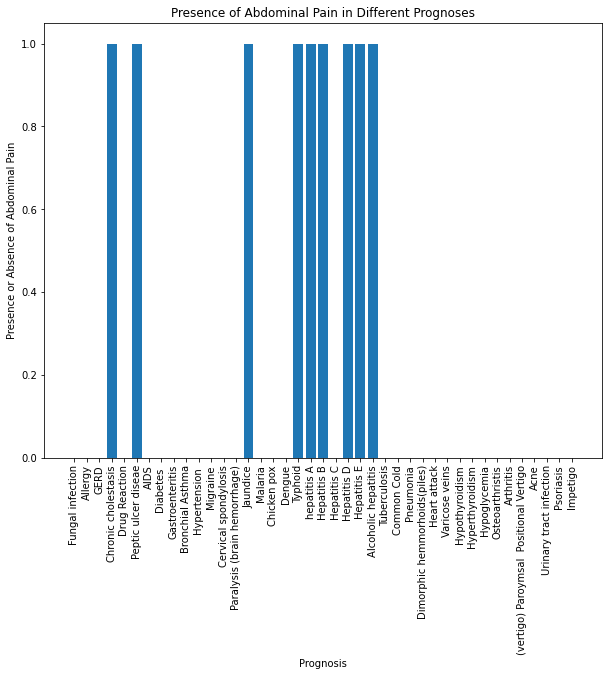

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['abdominal_pain'])
plt.title('Presence of Abdominal Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Abdominal Pain')
plt.xticks(rotation=90);
#beginning some data visualization
#it looks like abdominal pain is pretty common in several diagnoses

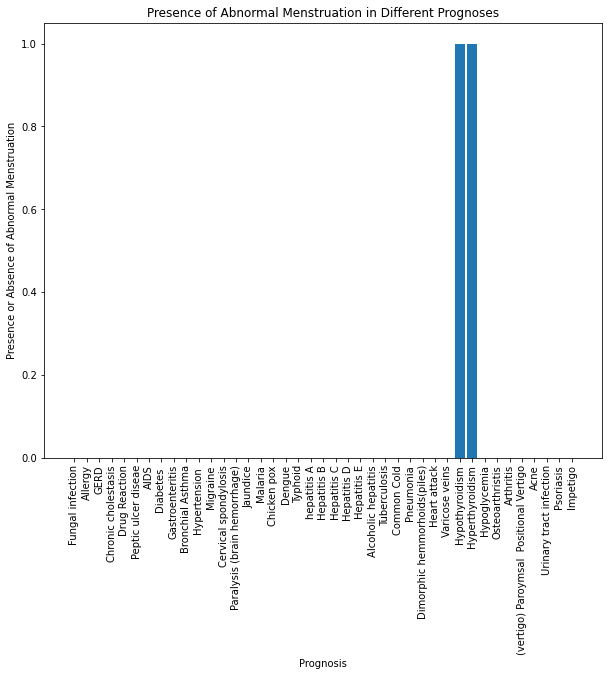

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['abnormal_menstruation'])
plt.title('Presence of Abnormal Menstruation in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Abnormal Menstruation')
plt.xticks(rotation=90);

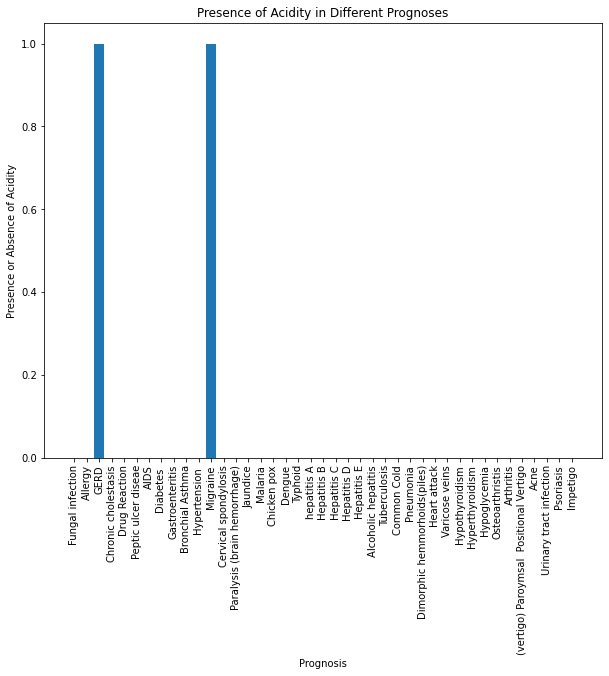

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['acidity'])
plt.title('Presence of Acidity in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Acidity')
plt.xticks(rotation=90);

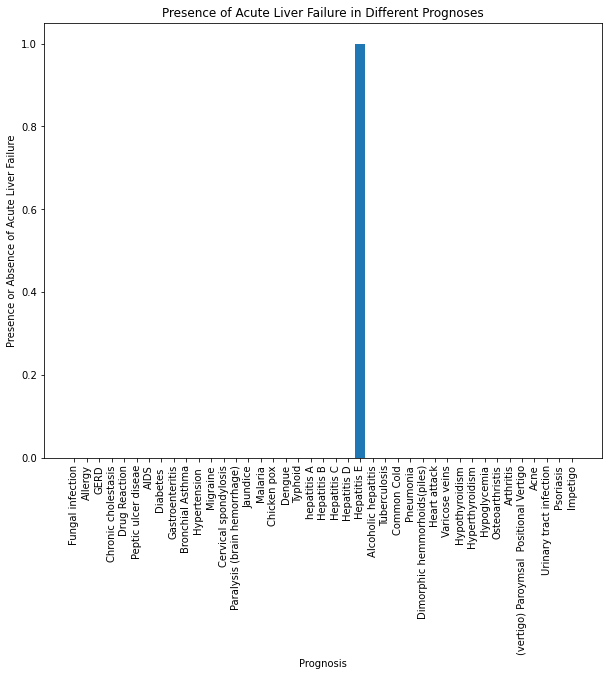

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['acute_liver_failure'])
plt.title('Presence of Acute Liver Failure in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Acute Liver Failure')
plt.xticks(rotation=90);

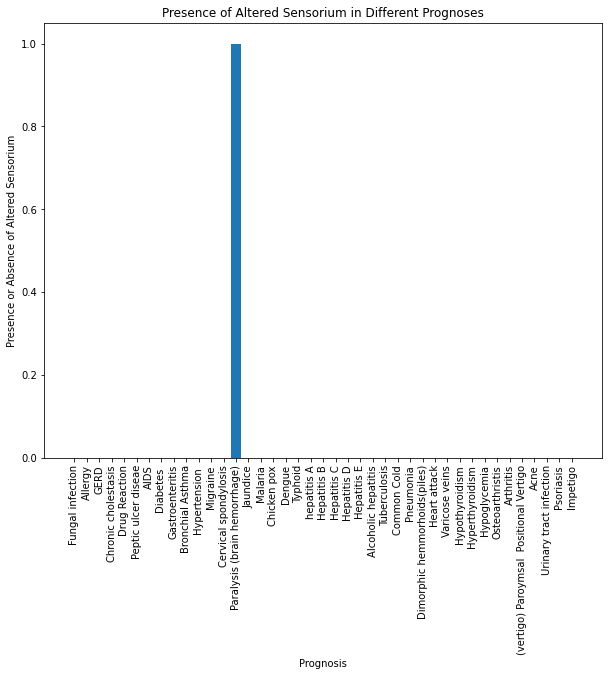

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['altered_sensorium'])
plt.title('Presence of Altered Sensorium in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Altered Sensorium')
plt.xticks(rotation=90);

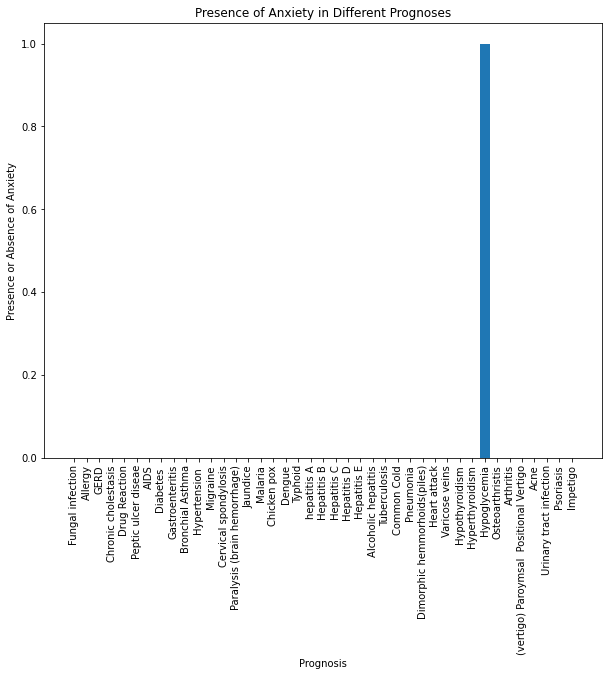

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['anxiety'])
plt.title('Presence of Anxiety in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Anxiety')
plt.xticks(rotation=90);
#this trend suggests issues with generalization
#while anxiety may correlate strongly to this prognosis, I find it hard to believe no other patients with other prognoses displayed anxiety

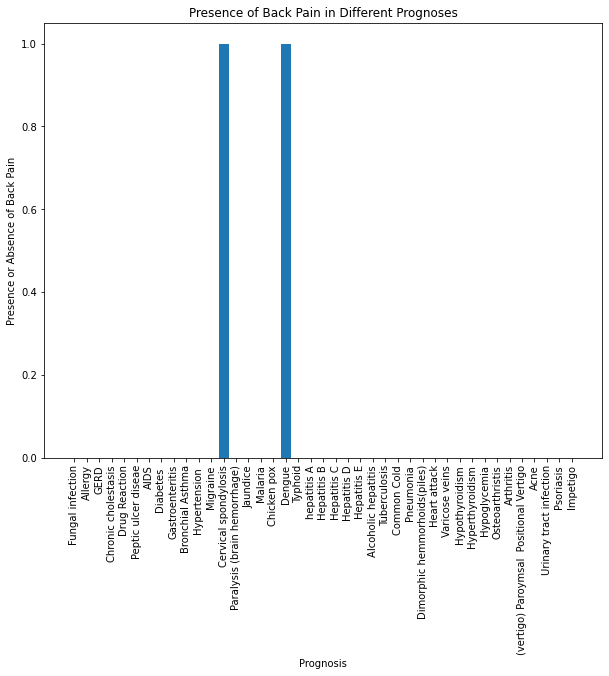

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['back_pain'])
plt.title('Presence of Back Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Back Pain')
plt.xticks(rotation=90);

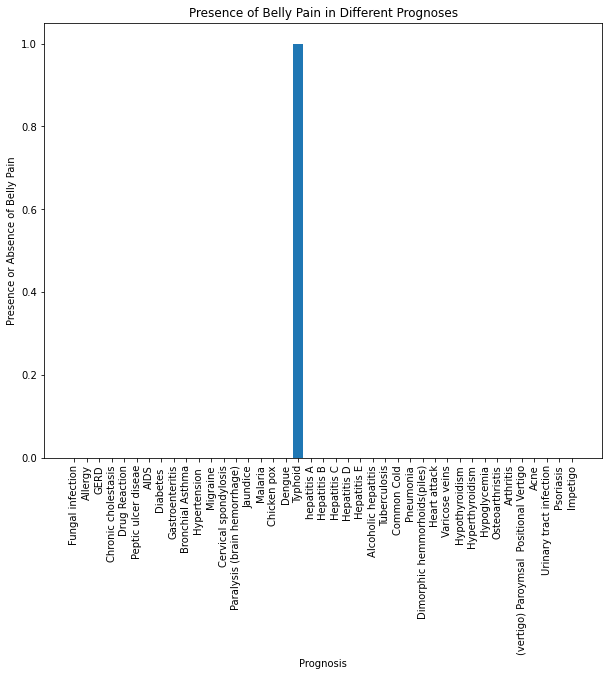

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['belly_pain'])
plt.title('Presence of Belly Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Belly Pain')
plt.xticks(rotation=90);

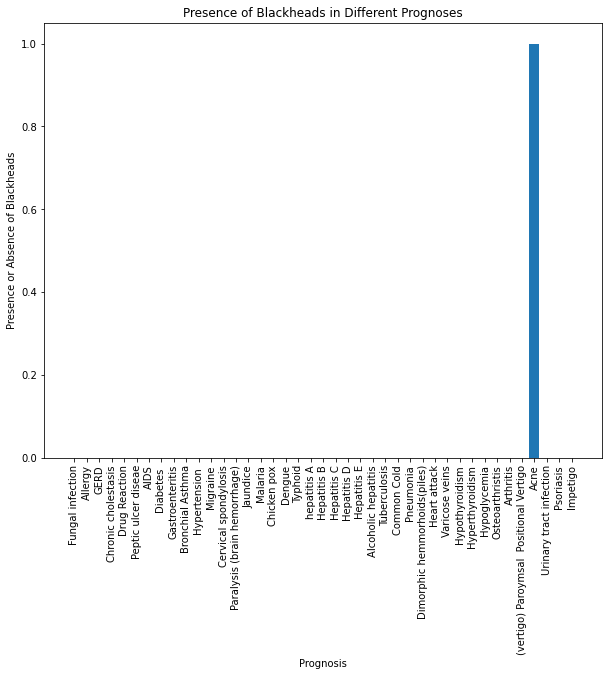

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['blackheads'])
plt.title('Presence of Blackheads in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Blackheads')
plt.xticks(rotation=90);

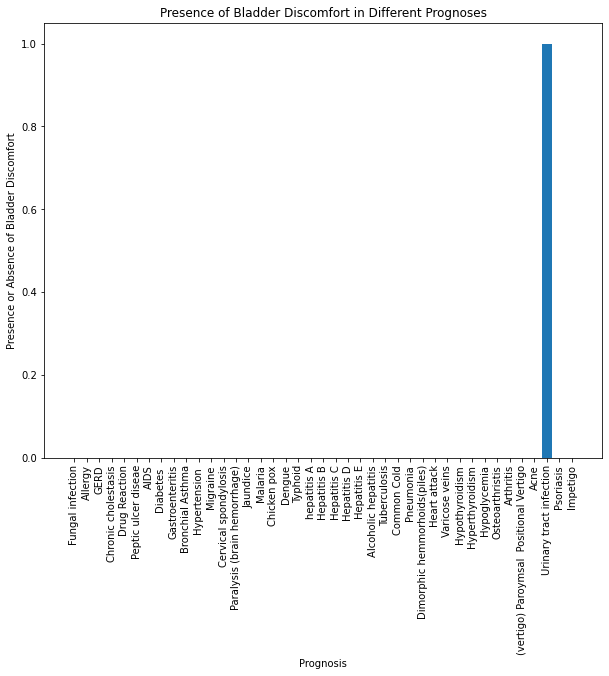

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['bladder_discomfort'])
plt.title('Presence of Bladder Discomfort in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Bladder Discomfort')
plt.xticks(rotation=90);

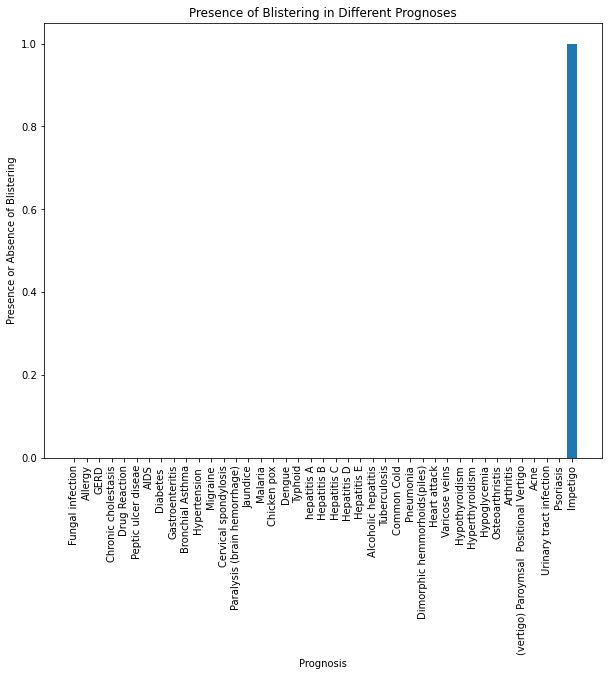

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['blister'])
plt.title('Presence of Blistering in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Blistering')
plt.xticks(rotation=90);

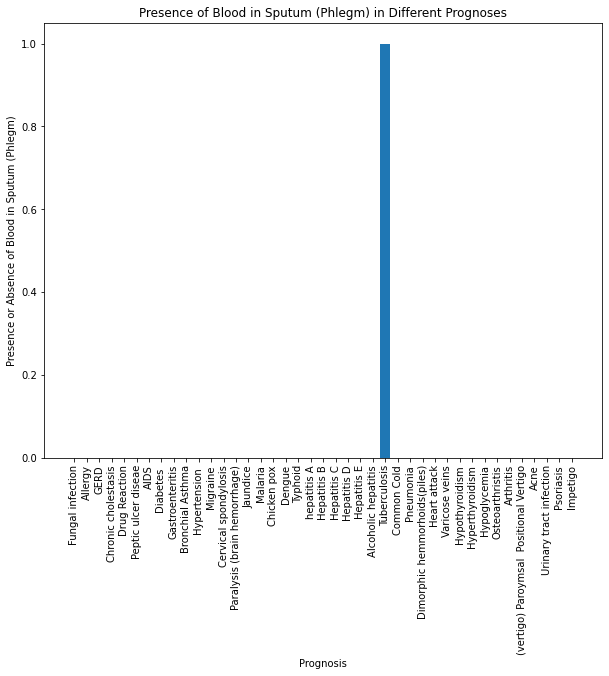

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['blood_in_sputum'])
plt.title('Presence of Blood in Sputum (Phlegm from Lungs) in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Blood in Sputum (Phlegm from Lungs)')
plt.xticks(rotation=90);

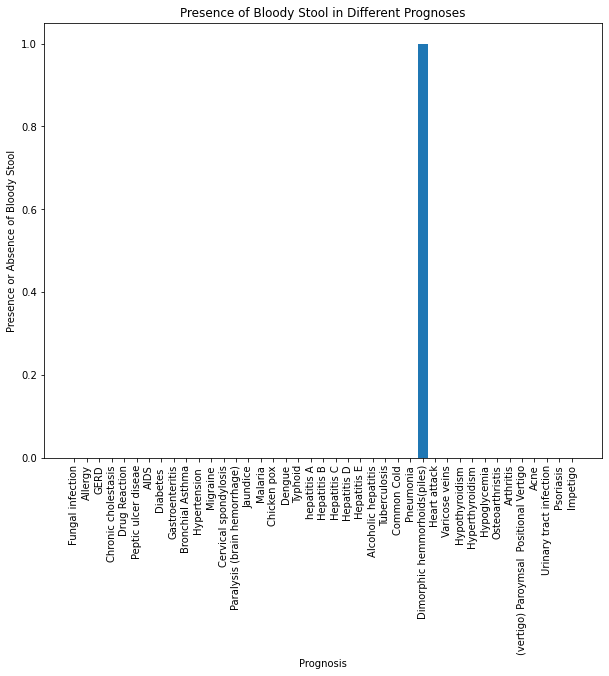

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['bloody_stool'])
plt.title('Presence of Bloody Stool in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Bloody Stool')
plt.xticks(rotation=90);

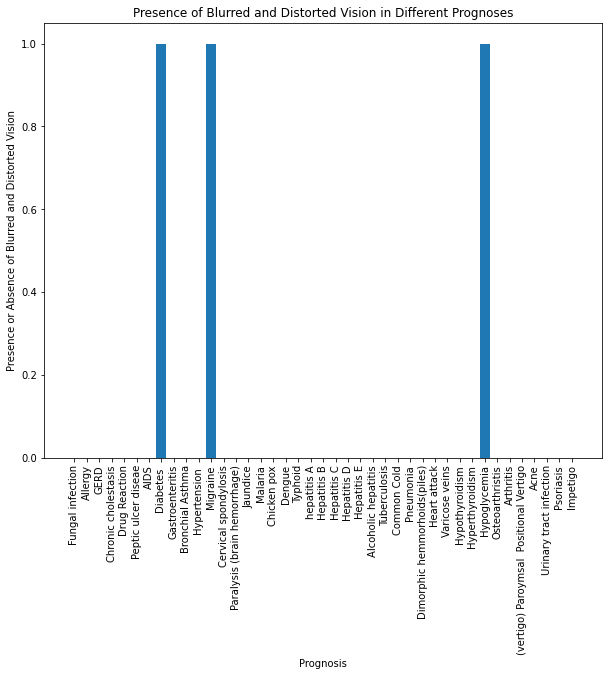

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['blurred_and_distorted_vision'])
plt.title('Presence of Blurred and Distorted Vision in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Blurred and Distorted Vision')
plt.xticks(rotation=90);

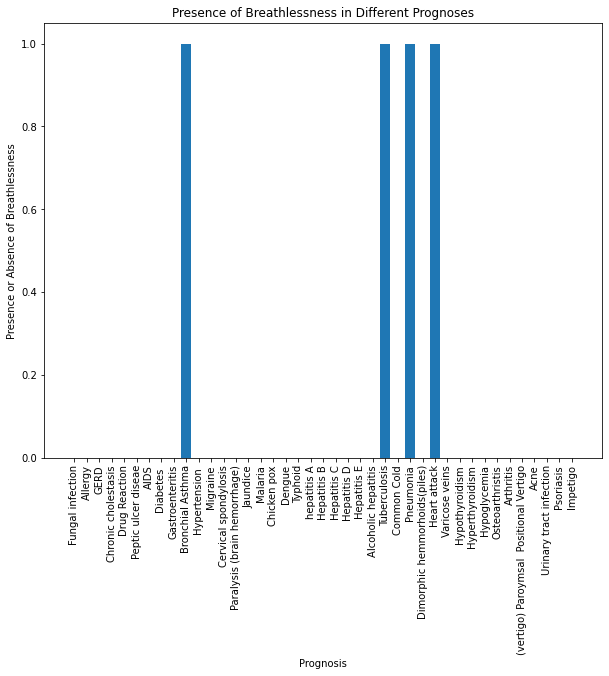

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['breathlessness'])
plt.title('Presence of Breathlessness in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Breathlessness')
plt.xticks(rotation=90);

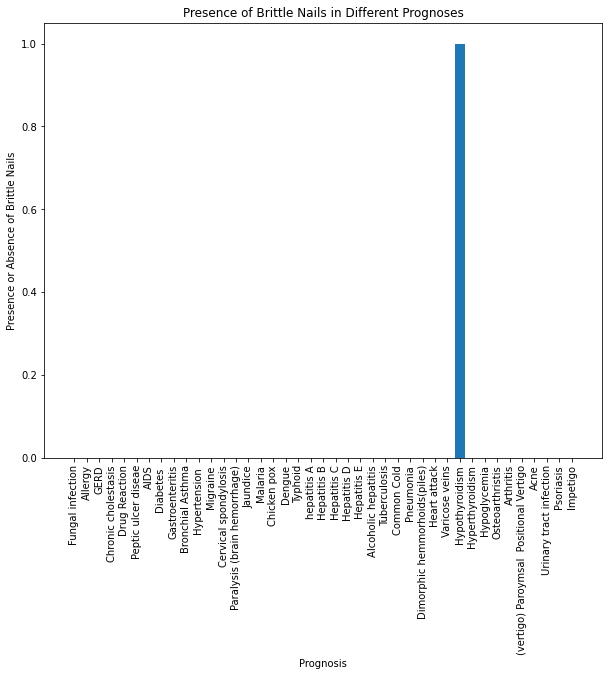

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['brittle_nails'])
plt.title('Presence of Brittle Nails in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Brittle Nails')
plt.xticks(rotation=90);

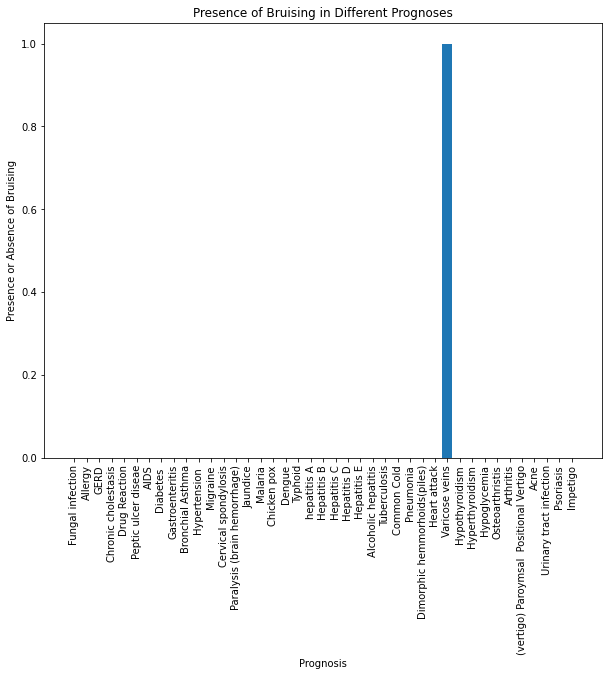

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['bruising'])
plt.title('Presence of Bruising in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Bruising')
plt.xticks(rotation=90);

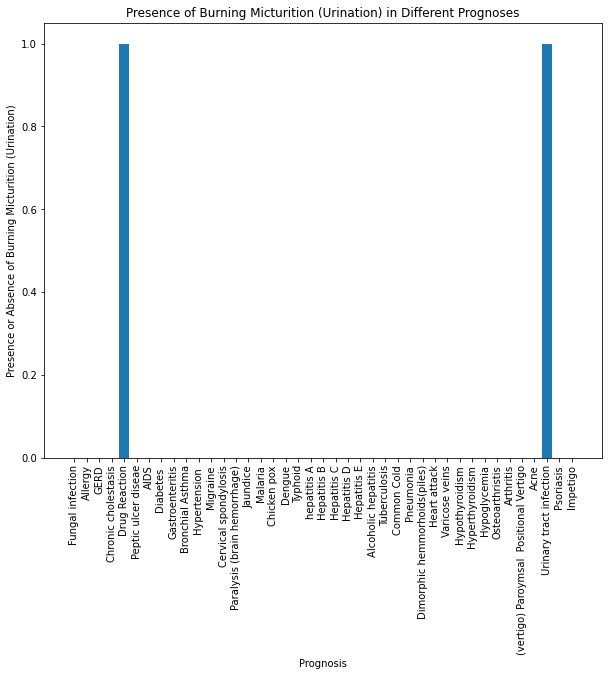

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['burning_micturition'])
plt.title('Presence of Burning Micturition (Urination) in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Burning Micturition (Urination)')
plt.xticks(rotation=90);

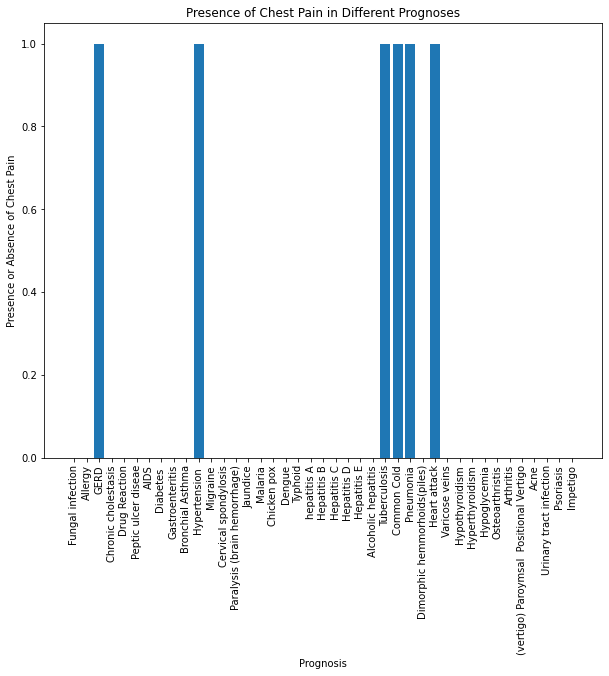

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['chest_pain'])
plt.title('Presence of Chest Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Chest Pain')
plt.xticks(rotation=90);

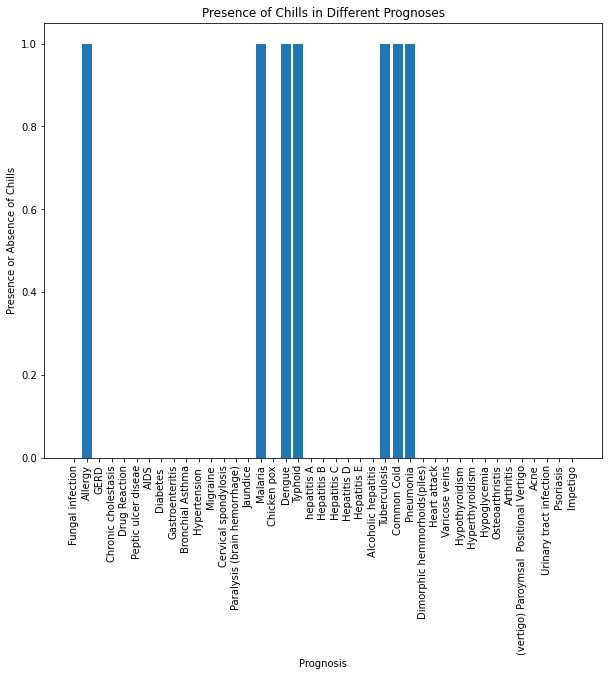

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['chills'])
plt.title('Presence of Chills in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Chills')
plt.xticks(rotation=90);

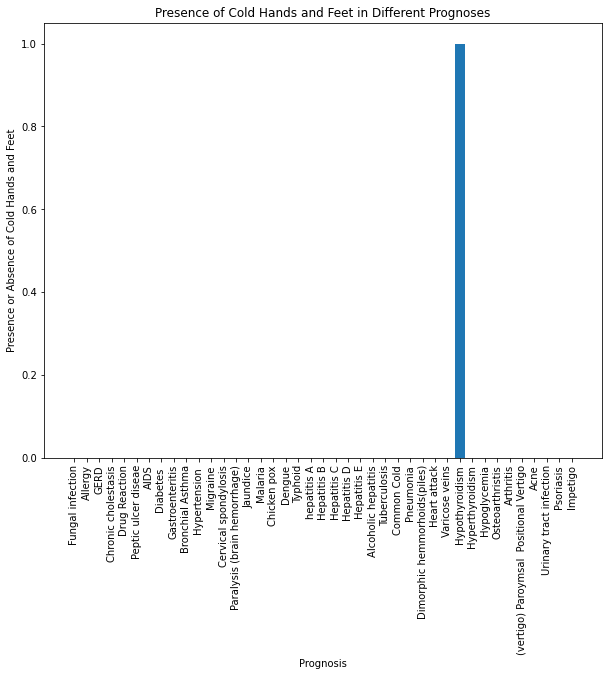

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['cold_hands_and_feets'])
plt.title('Presence of Cold Hands and Feet in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Cold Hands and Feet')
plt.xticks(rotation=90);

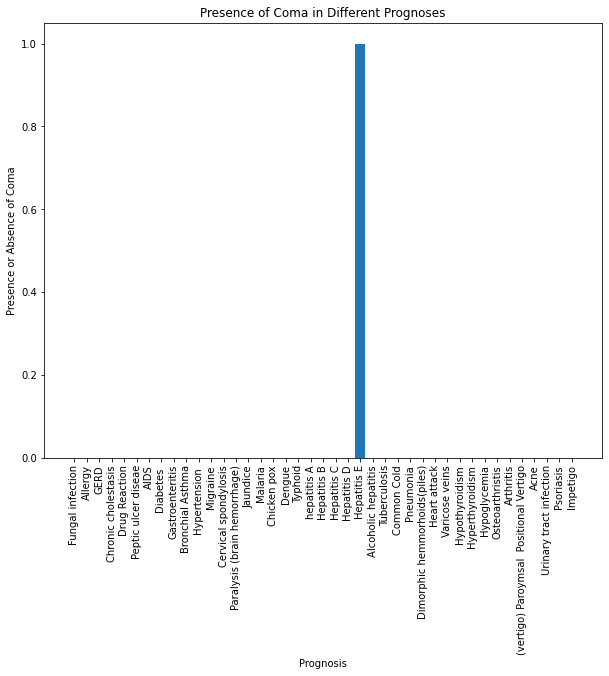

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['coma'])
plt.title('Presence of Coma in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Coma')
plt.xticks(rotation=90);

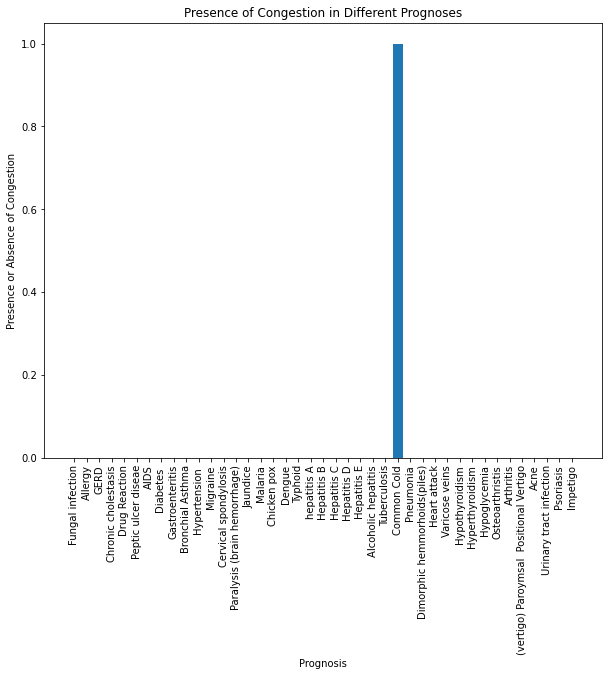

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['congestion'])
plt.title('Presence of Congestion in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Congestion')
plt.xticks(rotation=90);

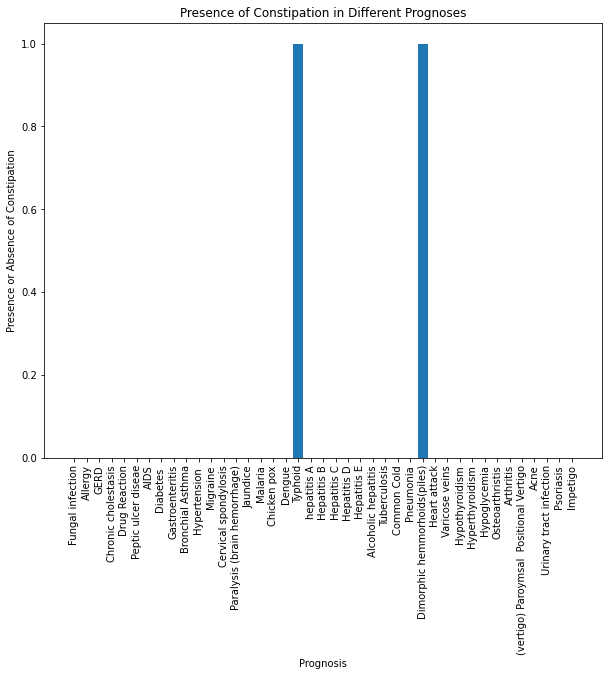

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['constipation'])
plt.title('Presence of Constipation in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Constipation')
plt.xticks(rotation=90);

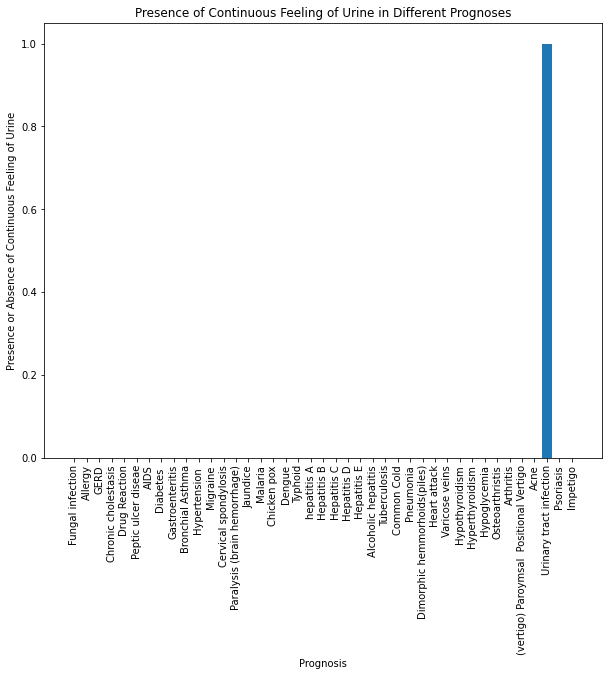

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['continuous_feel_of_urine'])
plt.title('Presence of Continuous Feeling of Urine in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Continuous Feeling of Urine')
plt.xticks(rotation=90);

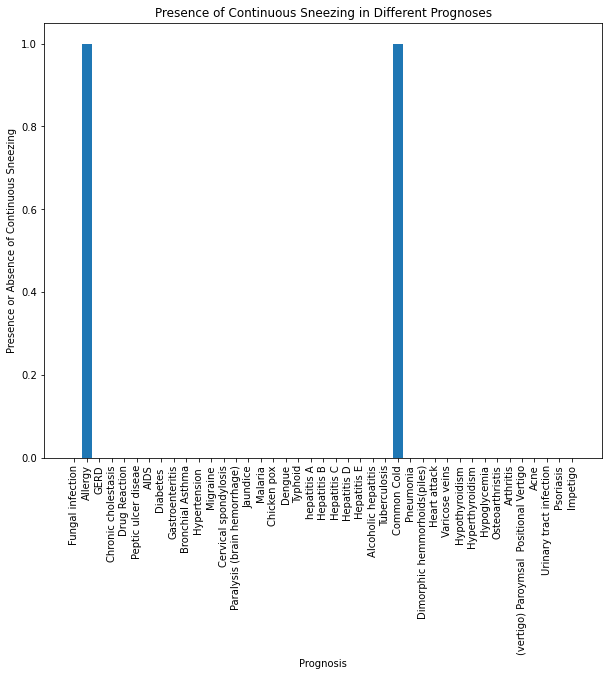

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['continuous_sneezing'])
plt.title('Presence of Continuous Sneezing in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Continuous Sneezing')
plt.xticks(rotation=90);

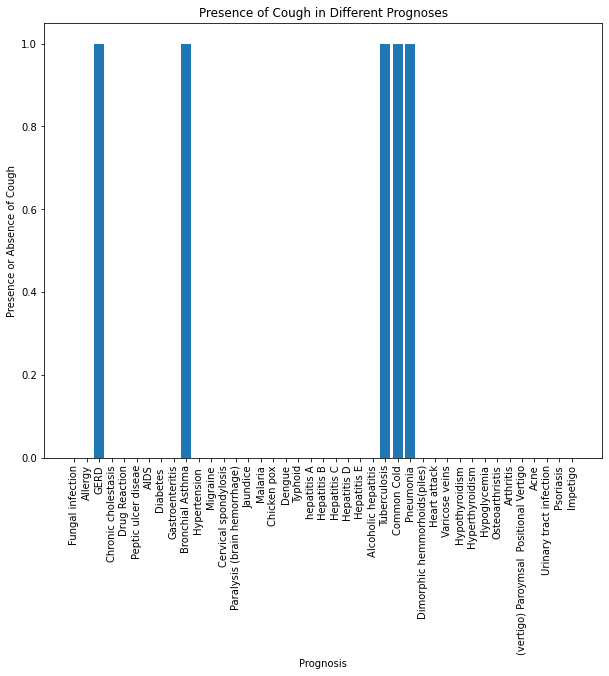

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['cough'])
plt.title('Presence of Cough in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Cough')
plt.xticks(rotation=90);

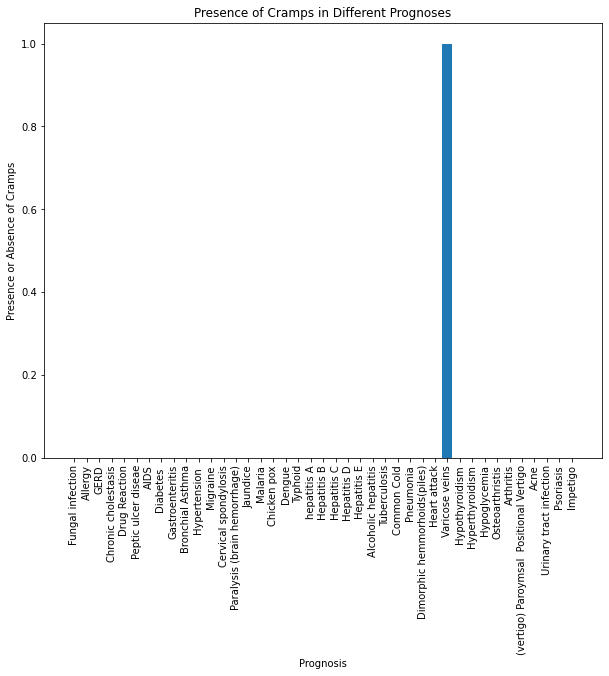

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['cramps'])
plt.title('Presence of Cramps in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Cramps')
plt.xticks(rotation=90);

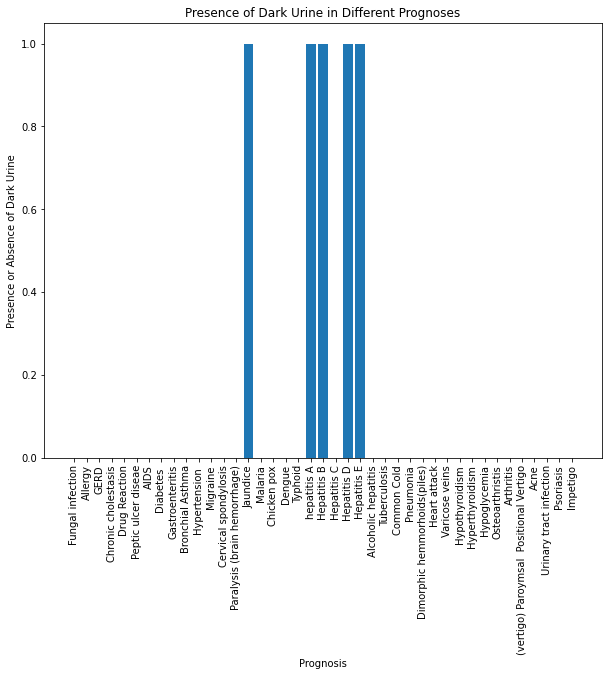

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['dark_urine'])
plt.title('Presence of Dark Urine in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Dark Urine')
plt.xticks(rotation=90);

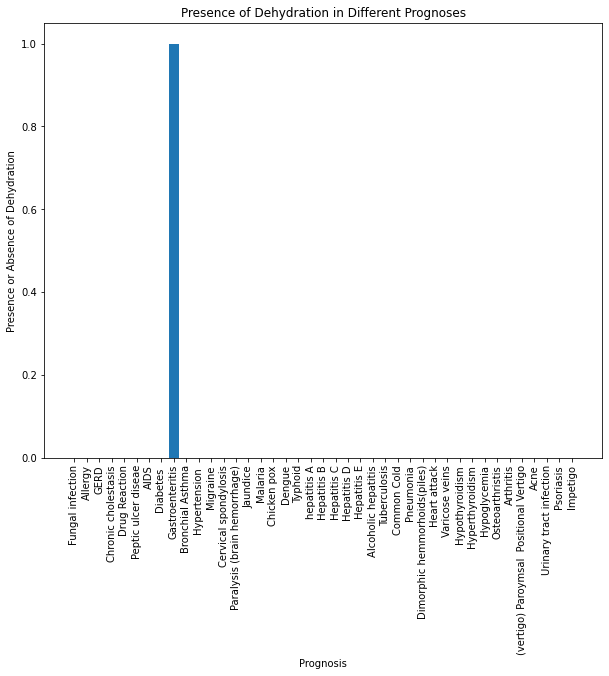

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['dehydration'])
plt.title('Presence of Dehydration in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Dehydration')
plt.xticks(rotation=90);

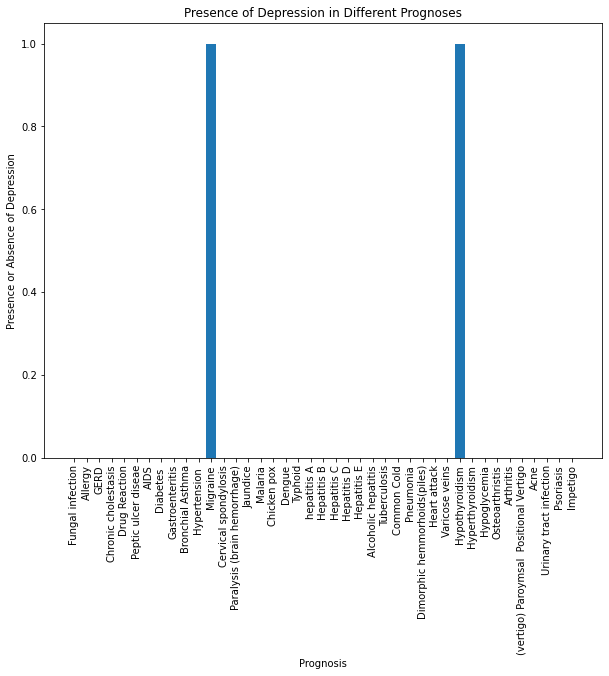

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['depression'])
plt.title('Presence of Depression in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Depression')
plt.xticks(rotation=90);

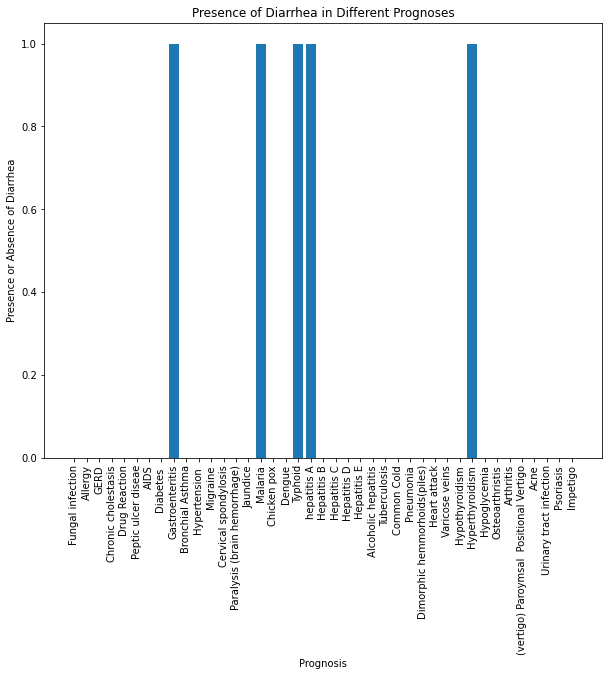

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['diarrhoea'])
plt.title('Presence of Diarrhea in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Diarrhea')
plt.xticks(rotation=90);

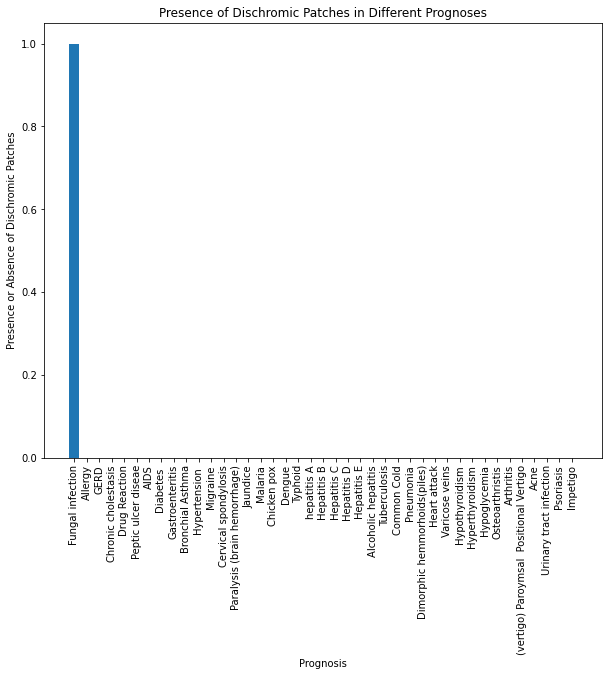

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['dischromic _patches'])
plt.title('Presence of Dischromic Patches in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Dischromic Patches')
plt.xticks(rotation=90);

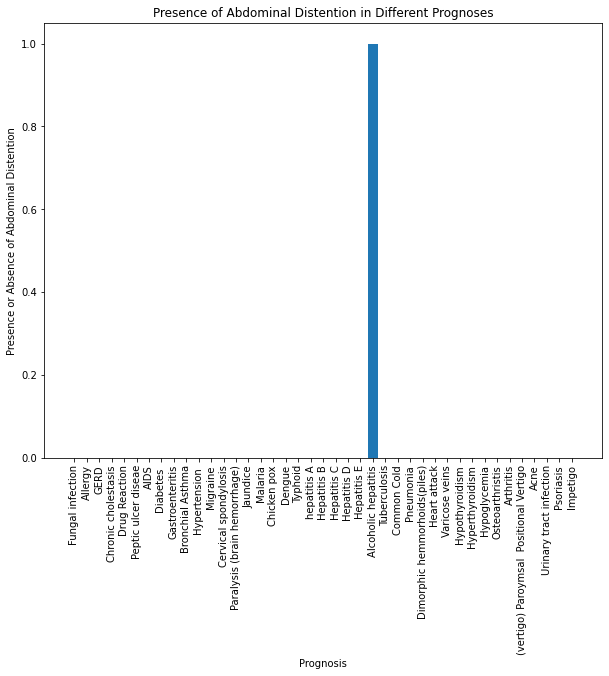

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['distention_of_abdomen'])
plt.title('Presence of Abdominal Distention in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Abdominal Distention')
plt.xticks(rotation=90);

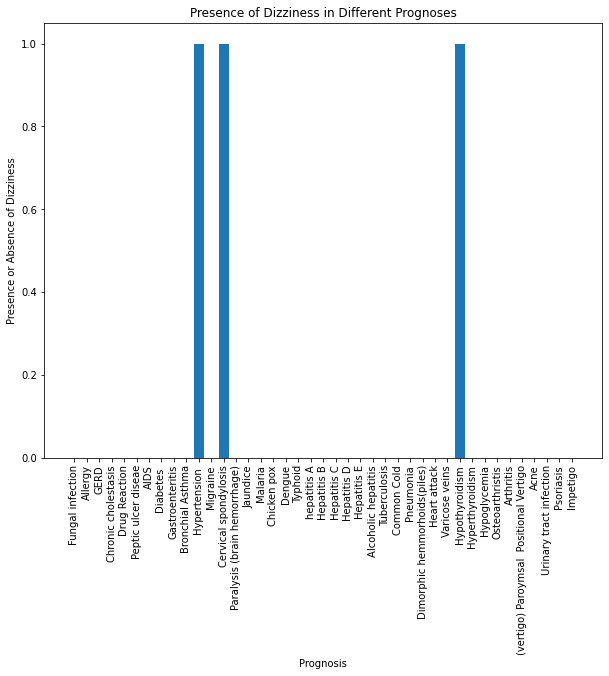

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['dizziness'])
plt.title('Presence of Dizziness in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Dizziness')
plt.xticks(rotation=90);

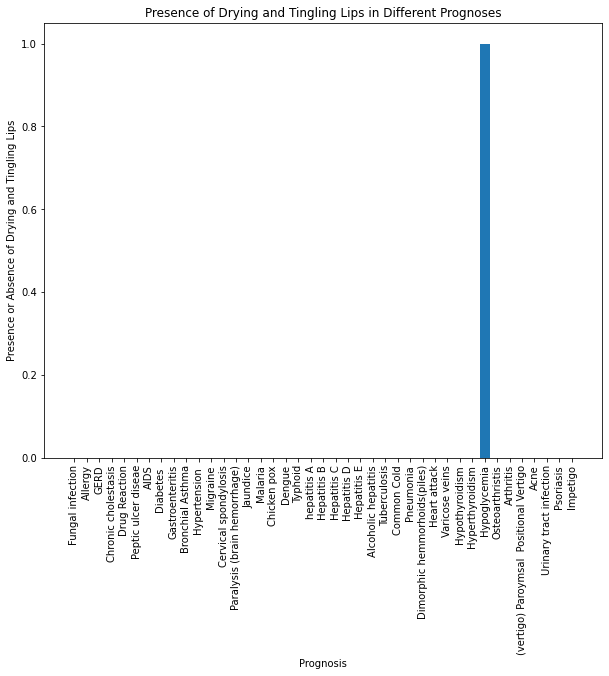

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['drying_and_tingling_lips'])
plt.title('Presence of Drying and Tingling Lips in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Drying and Tingling Lips')
plt.xticks(rotation=90);

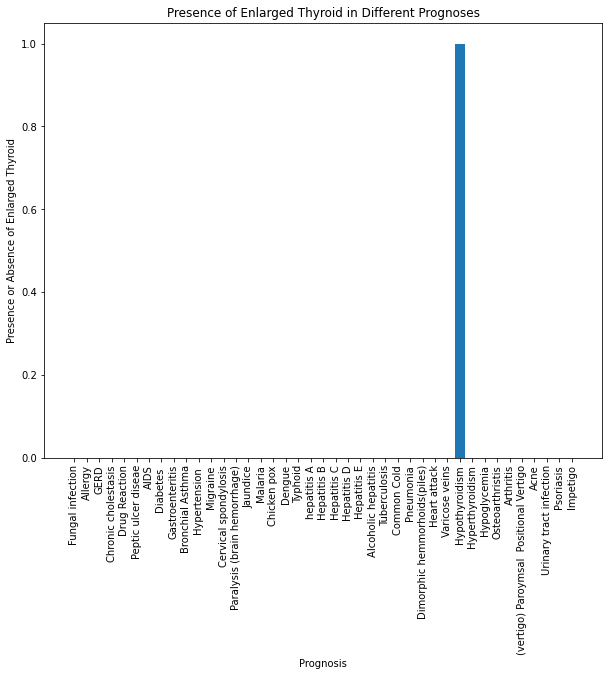

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['enlarged_thyroid'])
plt.title('Presence of Enlarged Thyroid in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Enlarged Thyroid')
plt.xticks(rotation=90);

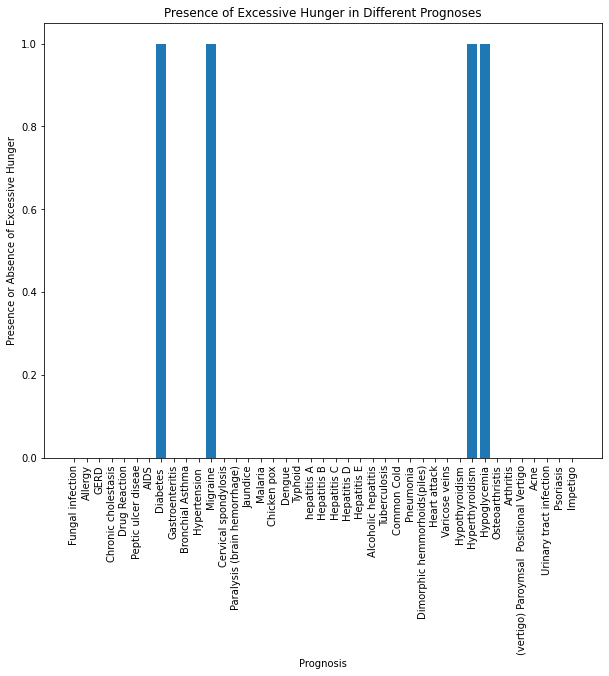

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['excessive_hunger'])
plt.title('Presence of Excessive Hunger in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Excessive Hunger')
plt.xticks(rotation=90);

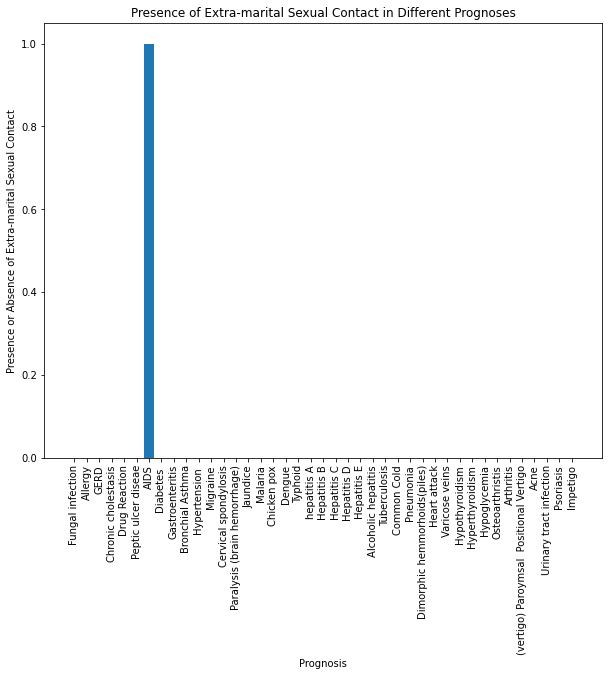

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['extra_marital_contacts'])
plt.title('Presence of Extra-marital Sexual Contact in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Extra-marital Sexual Contact')
plt.xticks(rotation=90);

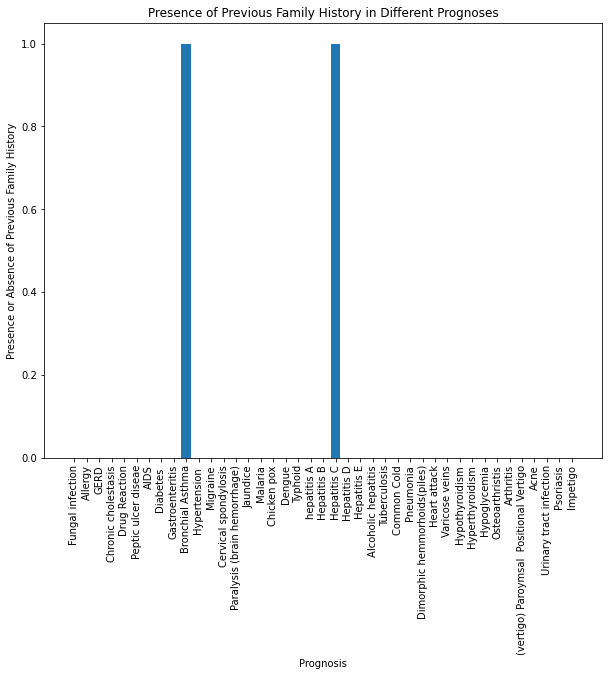

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['family_history'])
plt.title('Presence of Previous Family History in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Previous Family History')
plt.xticks(rotation=90);

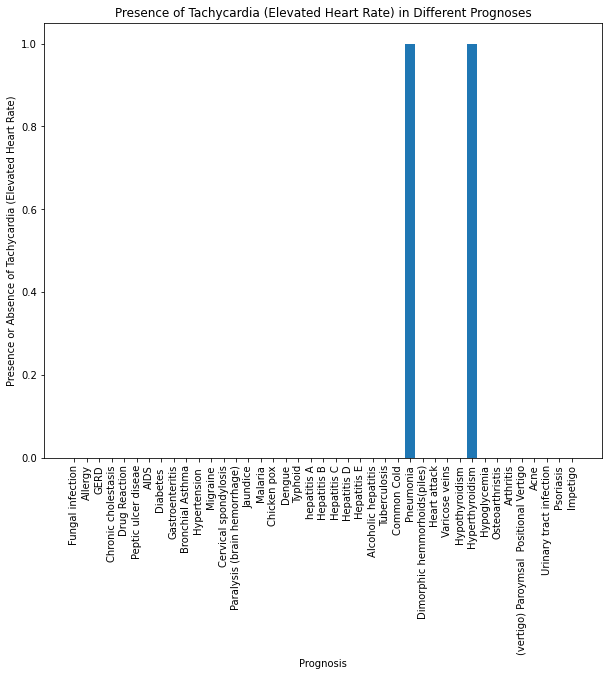

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['fast_heart_rate'])
plt.title('Presence of Tachycardia (Elevated Heart Rate) in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Tachycardia (Elevated Heart Rate)')
plt.xticks(rotation=90);

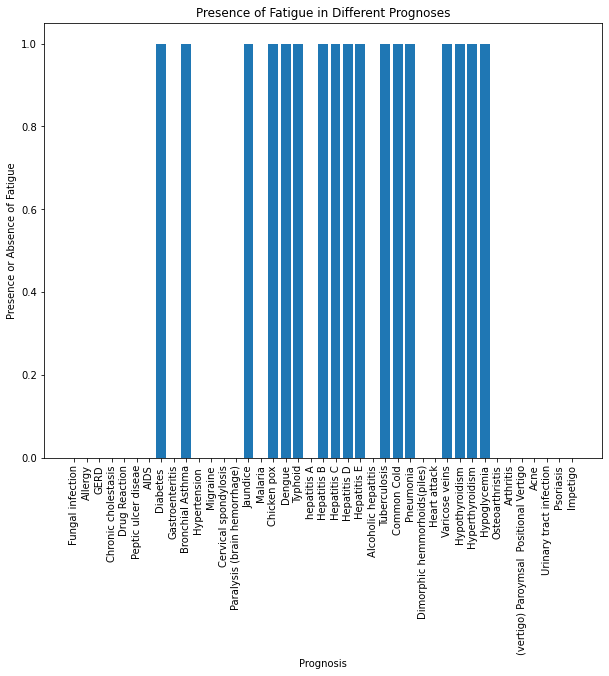

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['fatigue'])
plt.title('Presence of Fatigue in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Fatigue')
plt.xticks(rotation=90);

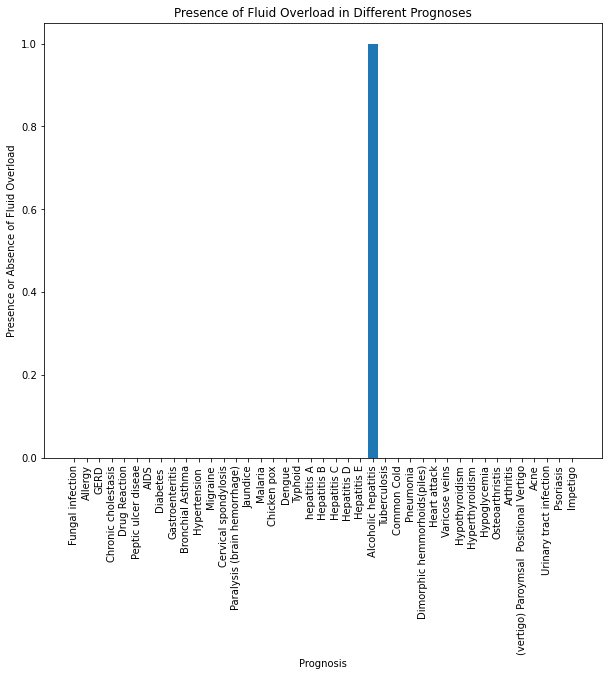

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['fluid_overload.1'])
plt.title('Presence of Fluid Overload in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Fluid Overload')
plt.xticks(rotation=90);

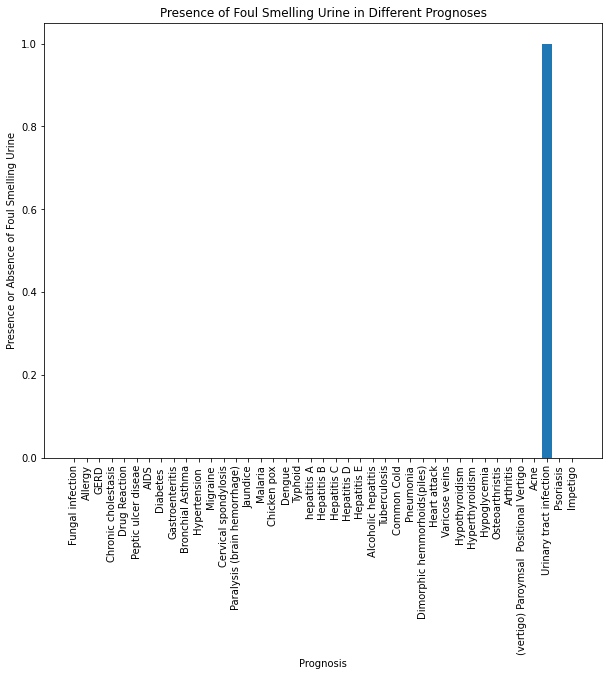

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['foul_smell_of urine'])
plt.title('Presence of Foul Smelling Urine in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Foul Smelling Urine')
plt.xticks(rotation=90);

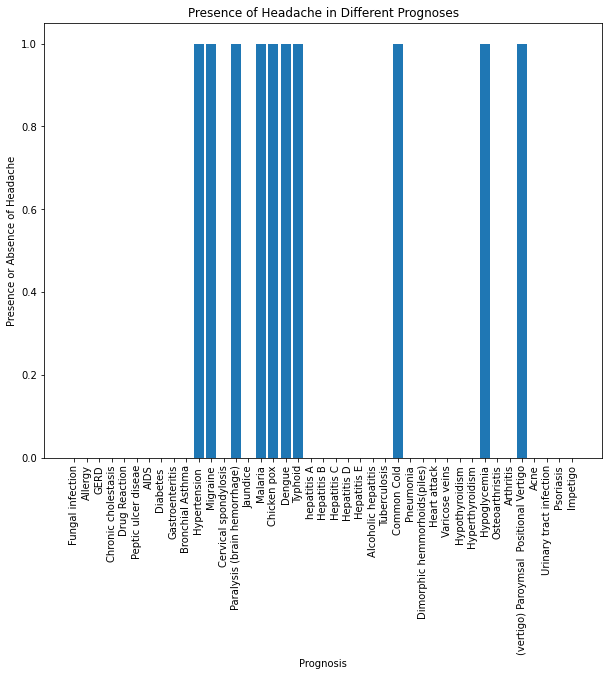

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['headache'])
plt.title('Presence of Headache in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Headache')
plt.xticks(rotation=90);

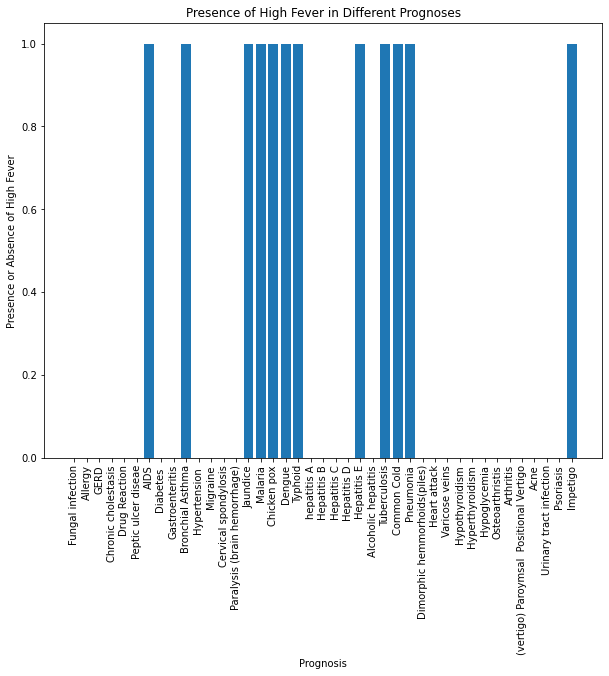

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['high_fever'])
plt.title('Presence of High Fever in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of High Fever')
plt.xticks(rotation=90);

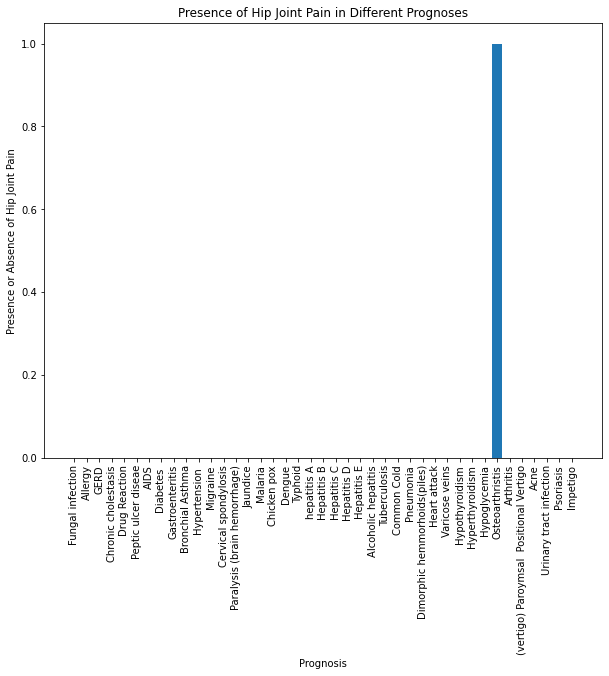

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['hip_joint_pain'])
plt.title('Presence of Hip Joint Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Hip Joint Pain')
plt.xticks(rotation=90);

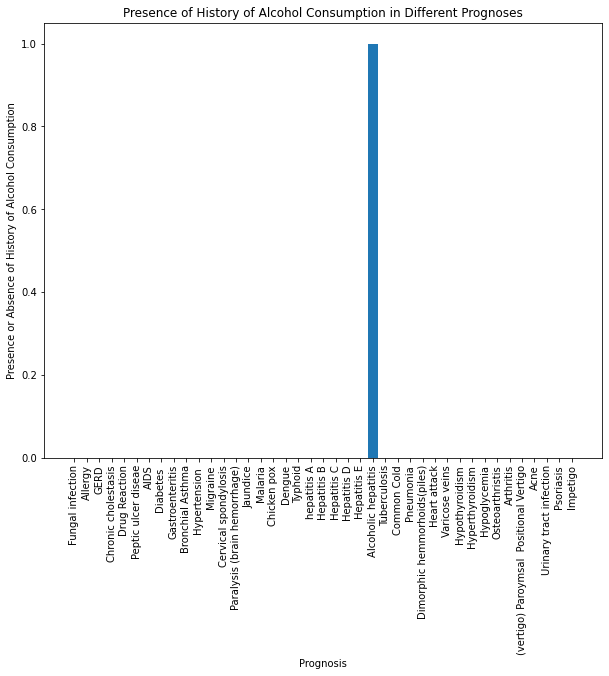

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['history_of_alcohol_consumption'])
plt.title('Presence of History of Alcohol Consumption in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of History of Alcohol Consumption')
plt.xticks(rotation=90);

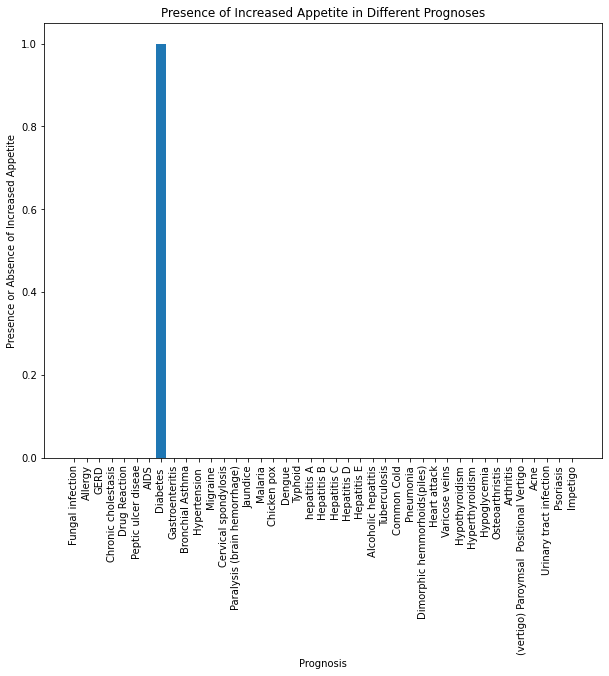

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['increased_appetite'])
plt.title('Presence of Increased Appetite in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Increased Appetite')
plt.xticks(rotation=90);

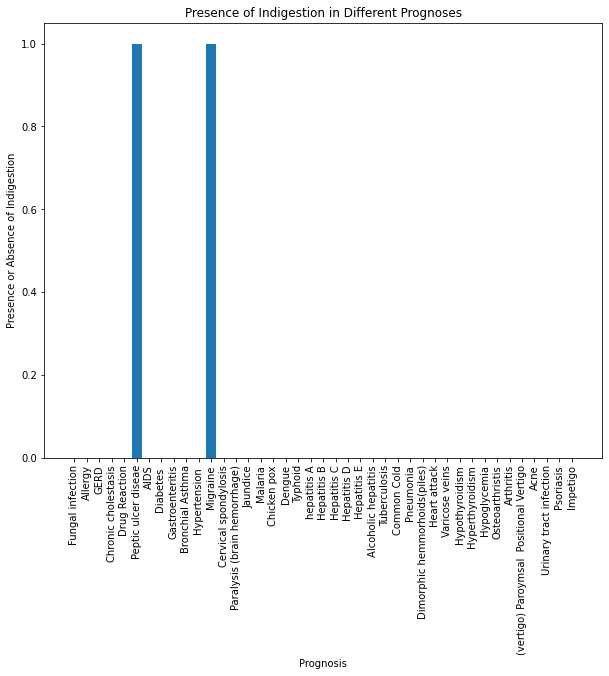

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['indigestion'])
plt.title('Presence of Indigestion in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Indigestion')
plt.xticks(rotation=90);

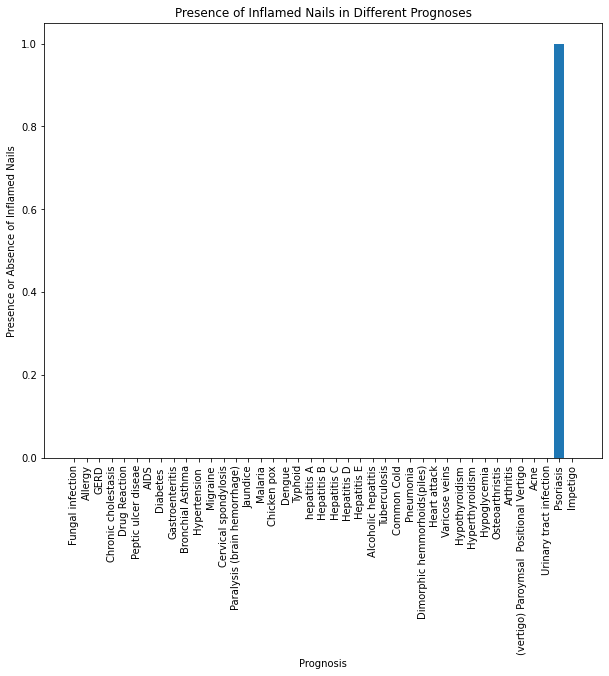

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['inflammatory_nails'])
plt.title('Presence of Inflamed Nails in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Inflamed Nails')
plt.xticks(rotation=90);

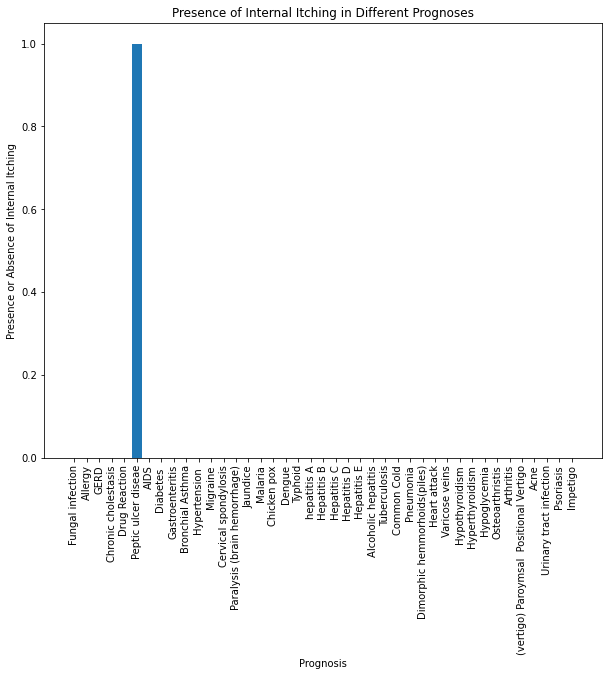

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['internal_itching'])
plt.title('Presence of Internal Itching in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Internal Itching')
plt.xticks(rotation=90);

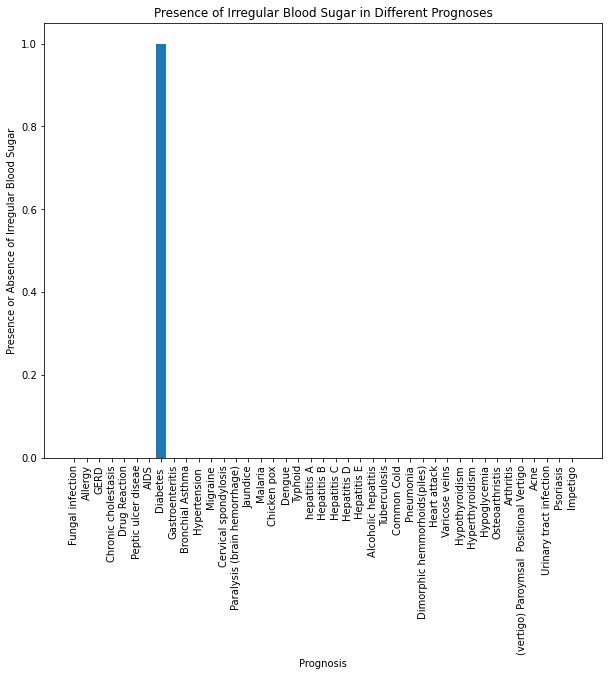

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['irregular_sugar_level'])
plt.title('Presence of Irregular Blood Sugar in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Irregular Blood Sugar')
plt.xticks(rotation=90);

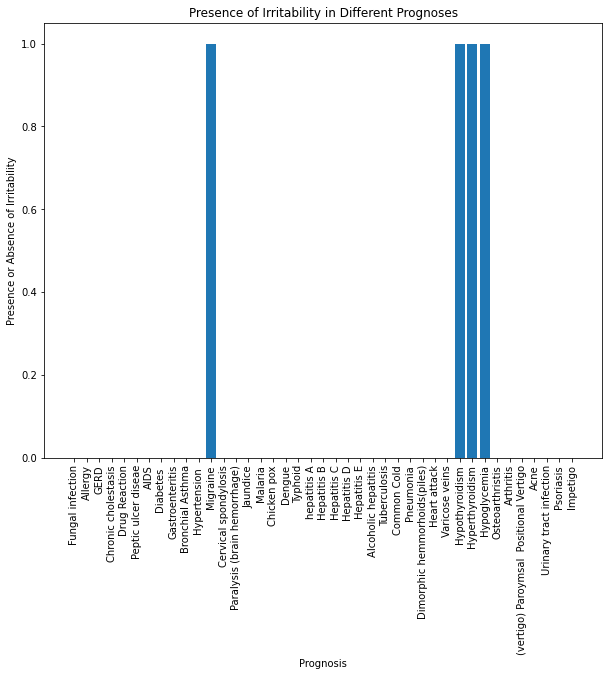

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['irritability'])
plt.title('Presence of Irritability in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Irritability')
plt.xticks(rotation=90);

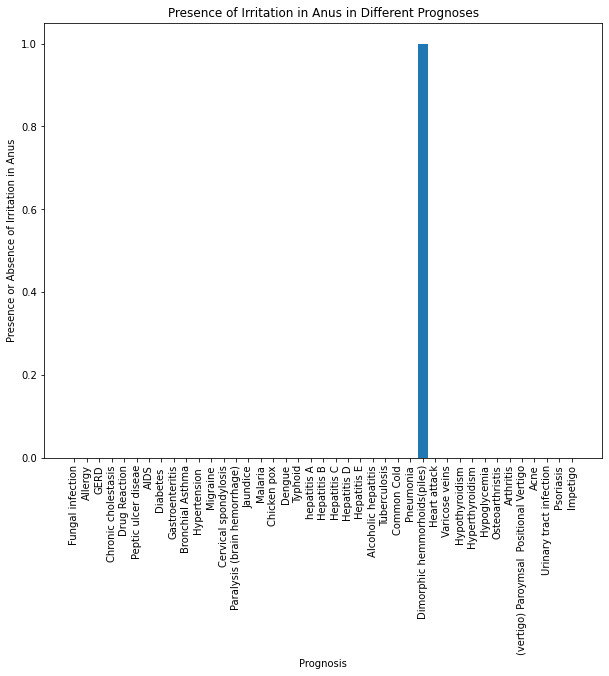

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['irritation_in_anus'])
plt.title('Presence of Irritation in Anus in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Irritation in Anus')
plt.xticks(rotation=90);

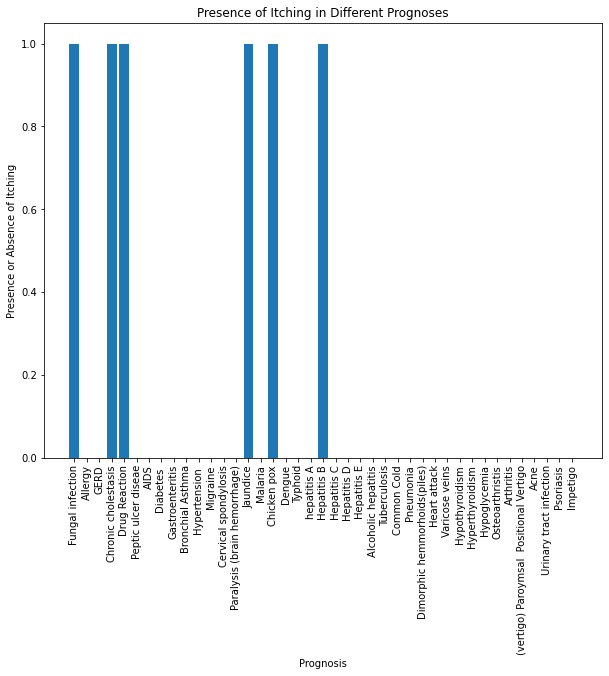

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['itching'])
plt.title('Presence of Itching in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Itching')
plt.xticks(rotation=90);

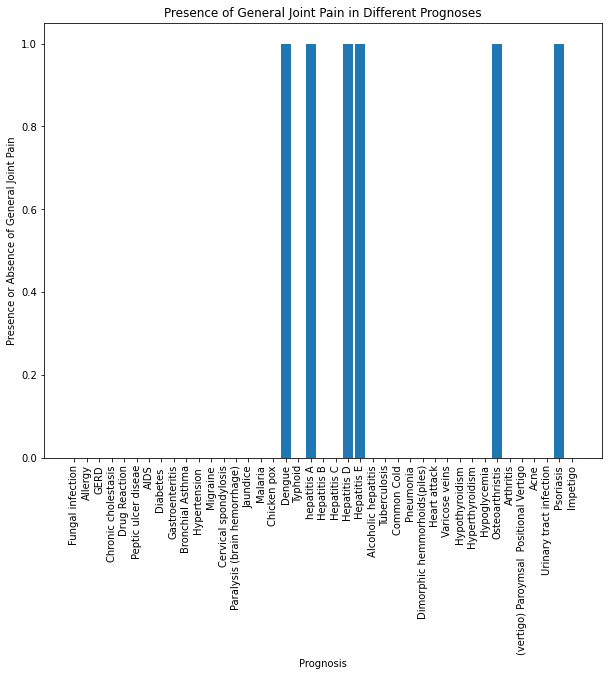

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['joint_pain'])
plt.title('Presence of General Joint Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of General Joint Pain')
plt.xticks(rotation=90);

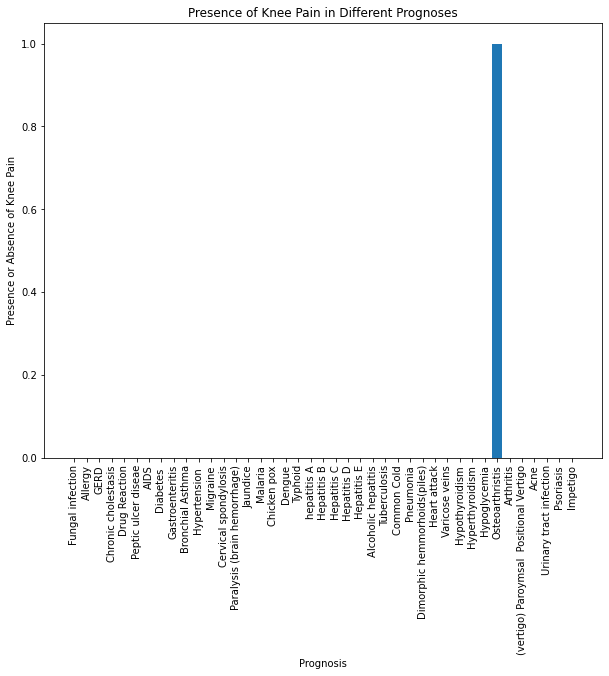

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['knee_pain'])
plt.title('Presence of Knee Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Knee Pain')
plt.xticks(rotation=90);

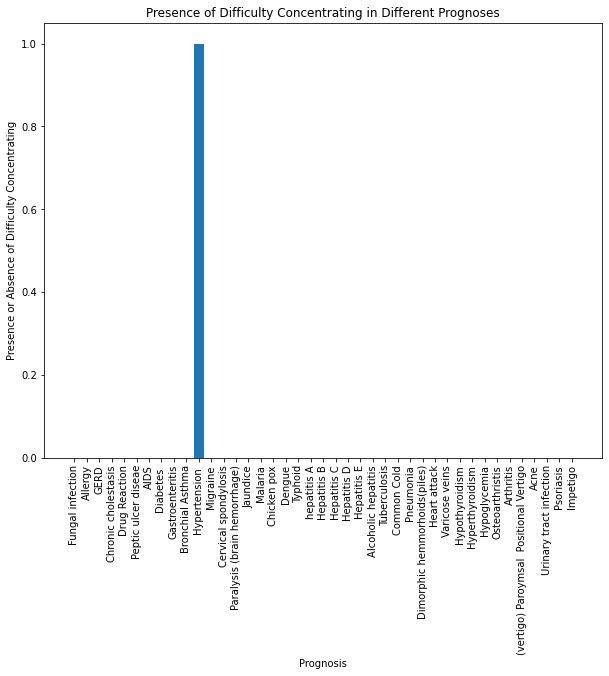

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['lack_of_concentration'])
plt.title('Presence of Difficulty Concentrating in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Difficulty Concentrating')
plt.xticks(rotation=90);

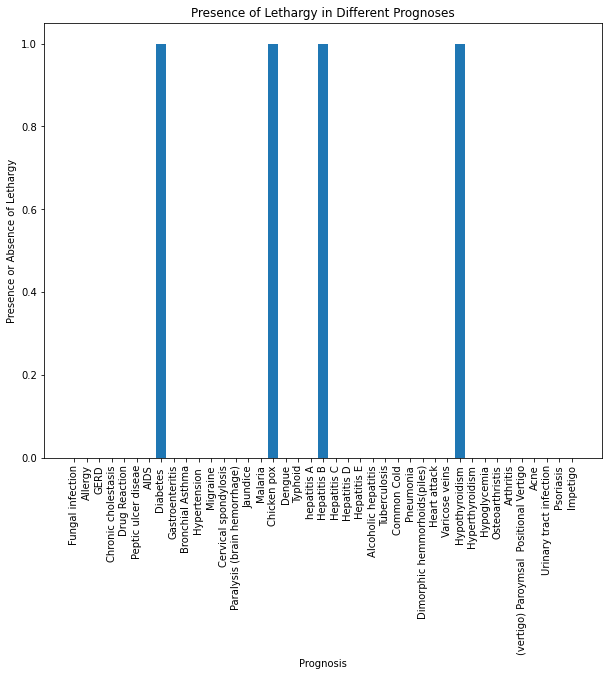

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['lethargy'])
plt.title('Presence of Lethargy in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Lethargy')
plt.xticks(rotation=90);

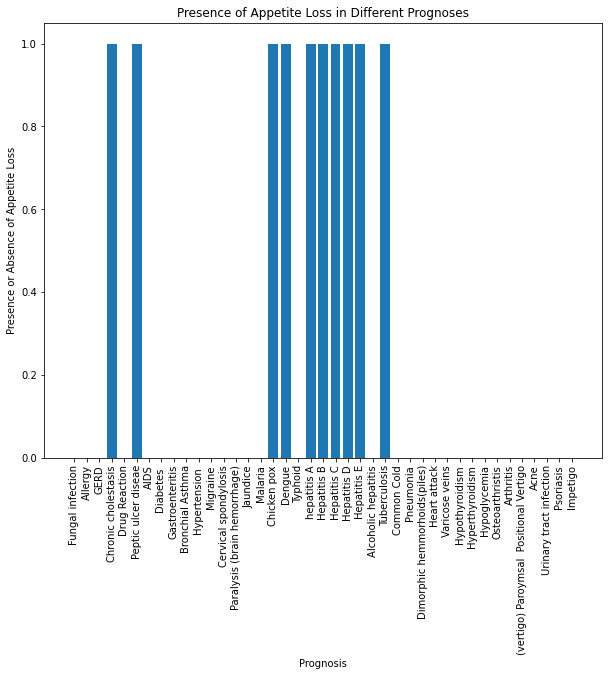

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['loss_of_appetite'])
plt.title('Presence of Appetite Loss in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Appetite Loss')
plt.xticks(rotation=90);

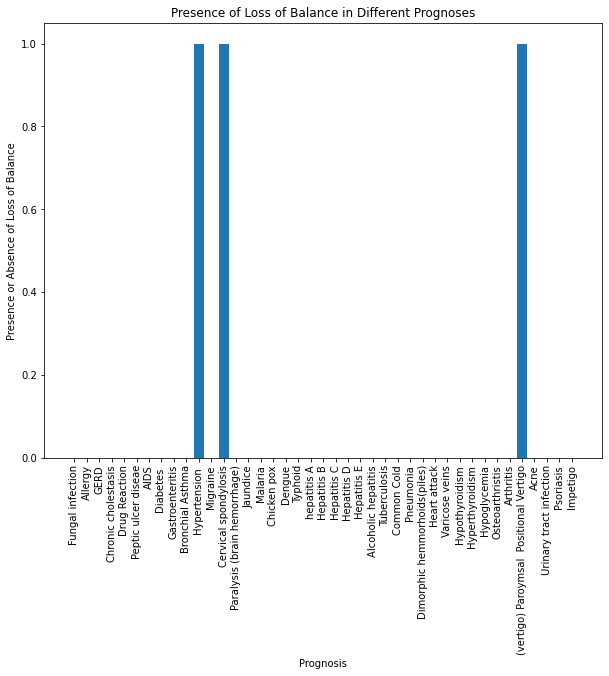

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['loss_of_balance'])
plt.title('Presence of Loss of Balance in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Loss of Balance')
plt.xticks(rotation=90);

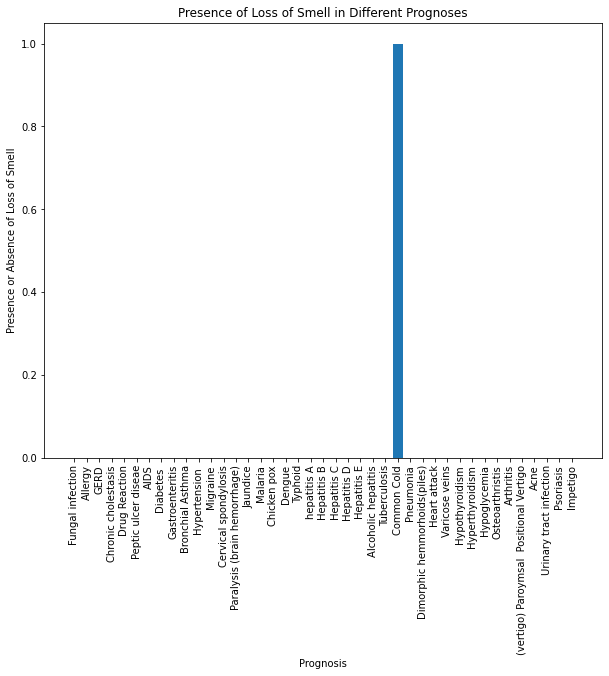

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['loss_of_smell'])
plt.title('Presence of Loss of Smell in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Loss of Smell')
plt.xticks(rotation=90);

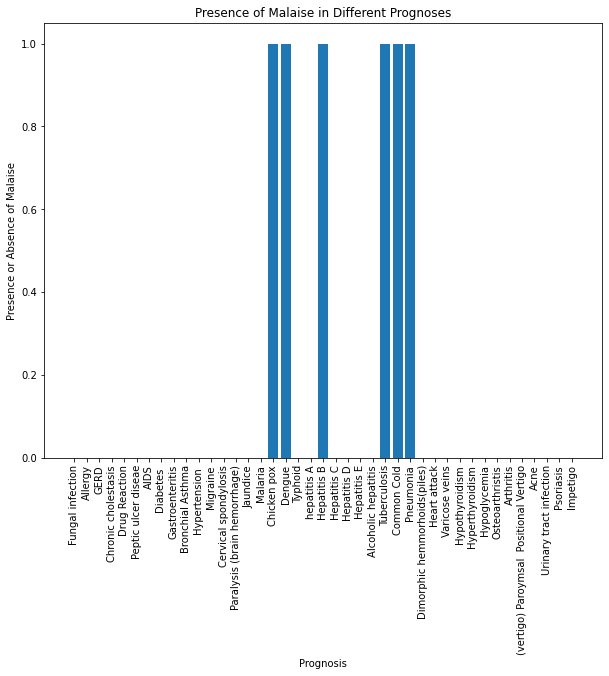

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['malaise'])
plt.title('Presence of Malaise in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Malaise')
plt.xticks(rotation=90);

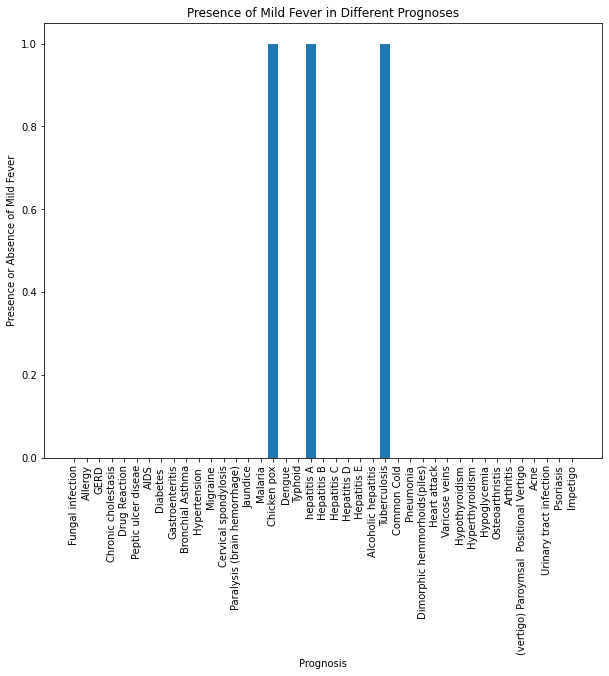

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['mild_fever'])
plt.title('Presence of Mild Fever in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Mild Fever')
plt.xticks(rotation=90);

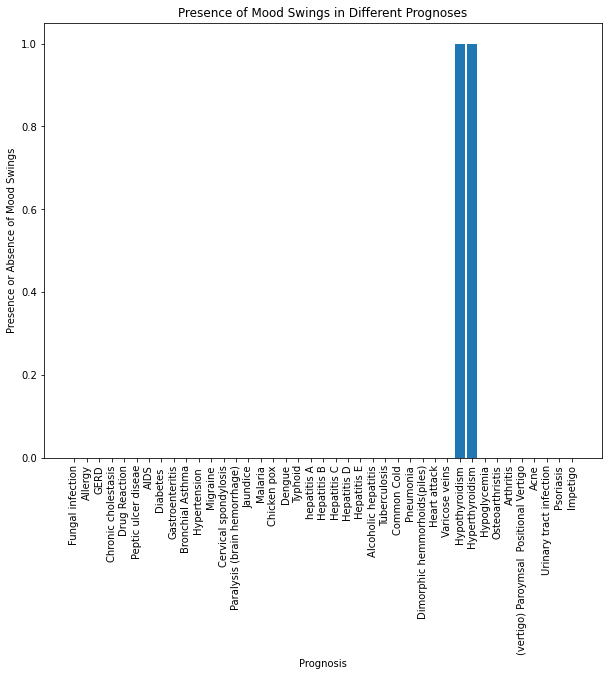

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['mood_swings'])
plt.title('Presence of Mood Swings in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Mood Swings')
plt.xticks(rotation=90);

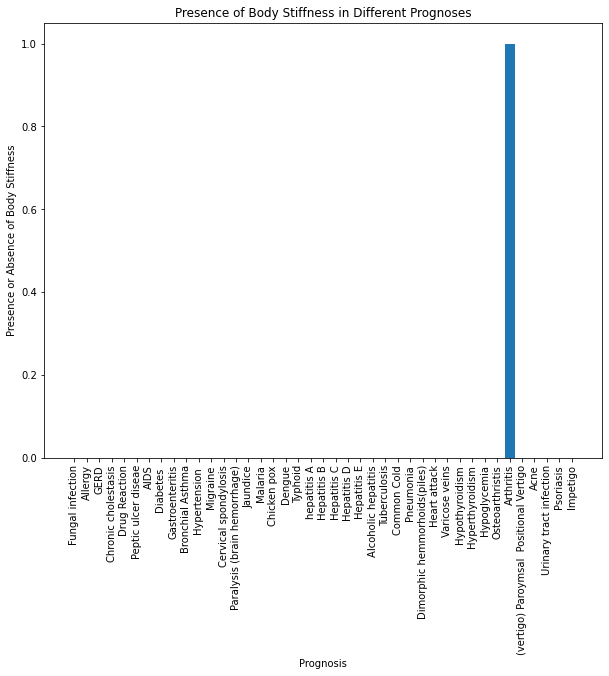

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['movement_stiffness'])
plt.title('Presence of Body Stiffness in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Body Stiffness')
plt.xticks(rotation=90);

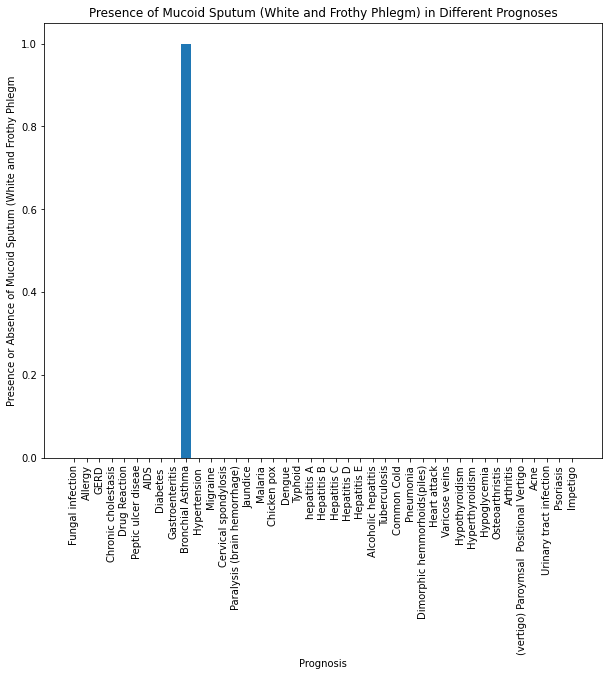

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['mucoid_sputum'])
plt.title('Presence of Mucoid Sputum (White and Frothy Phlegm from Lungs) in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Mucoid Sputum (White and Frothy Phlegm from Lungs')
plt.xticks(rotation=90);

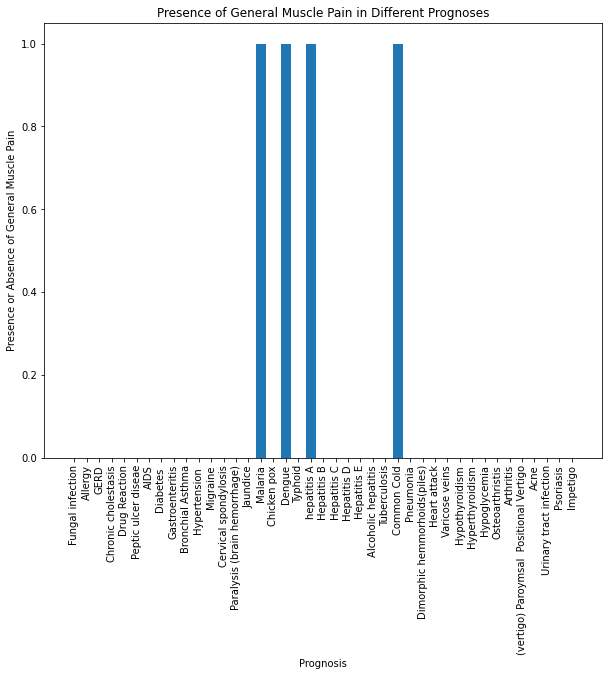

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['muscle_pain'])
plt.title('Presence of General Muscle Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of General Muscle Pain')
plt.xticks(rotation=90);

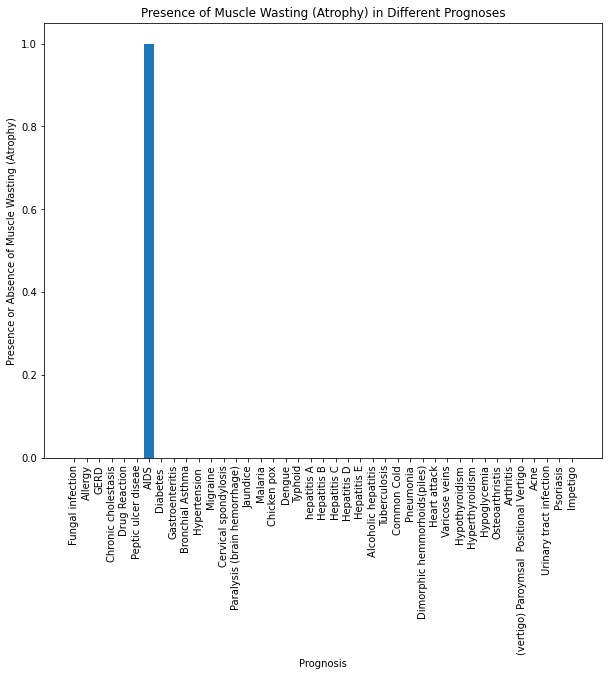

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['muscle_wasting'])
plt.title('Presence of Muscle Wasting (Atrophy) in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Muscle Wasting (Atrophy)')
plt.xticks(rotation=90);

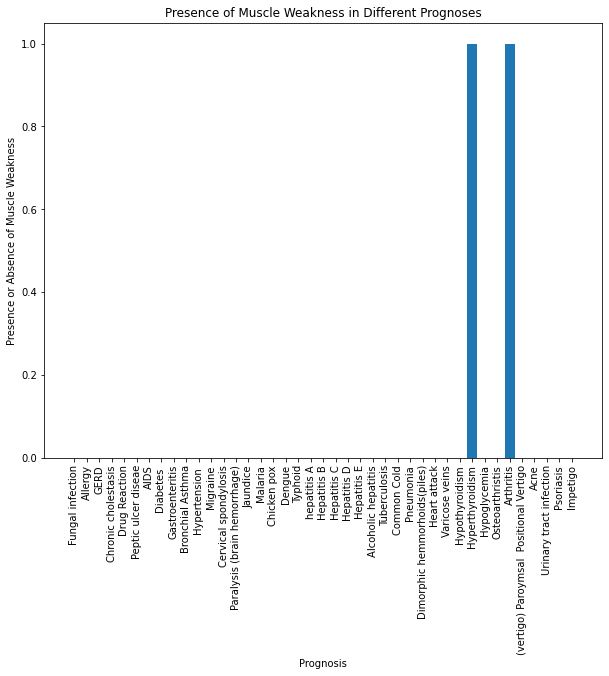

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['muscle_weakness'])
plt.title('Presence of Muscle Weakness in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Muscle Weakness')
plt.xticks(rotation=90);

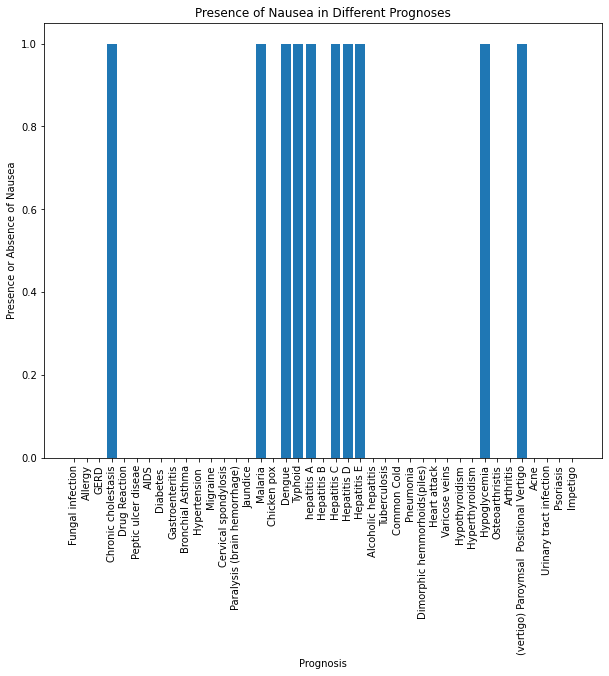

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['nausea'])
plt.title('Presence of Nausea in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Nausea')
plt.xticks(rotation=90);

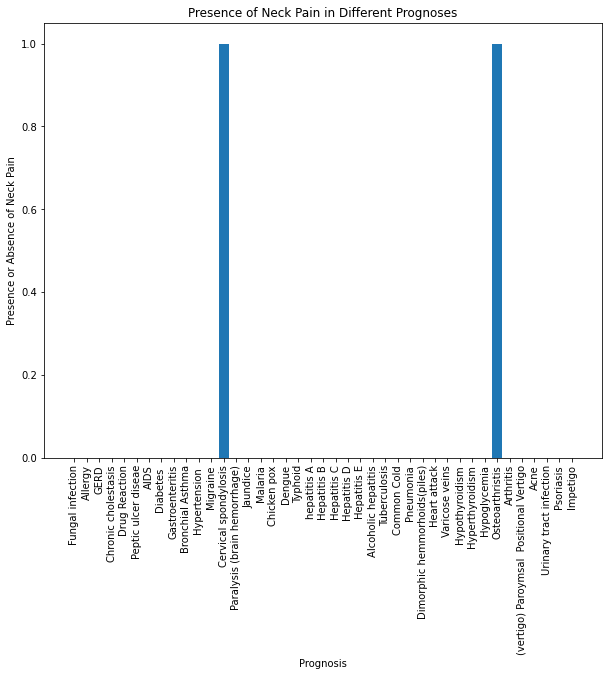

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['neck_pain'])
plt.title('Presence of Neck Pain in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Neck Pain')
plt.xticks(rotation=90);

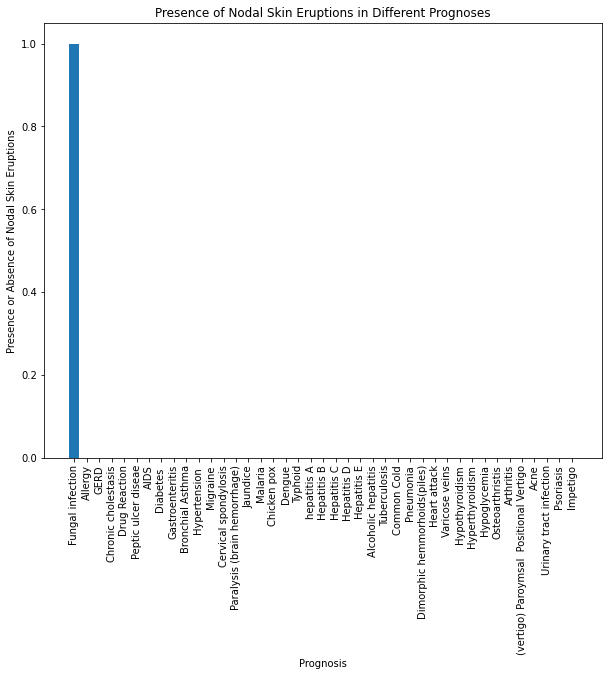

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['nodal_skin_eruptions'])
plt.title('Presence of Nodal Skin Eruptions in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Nodal Skin Eruptions')
plt.xticks(rotation=90);

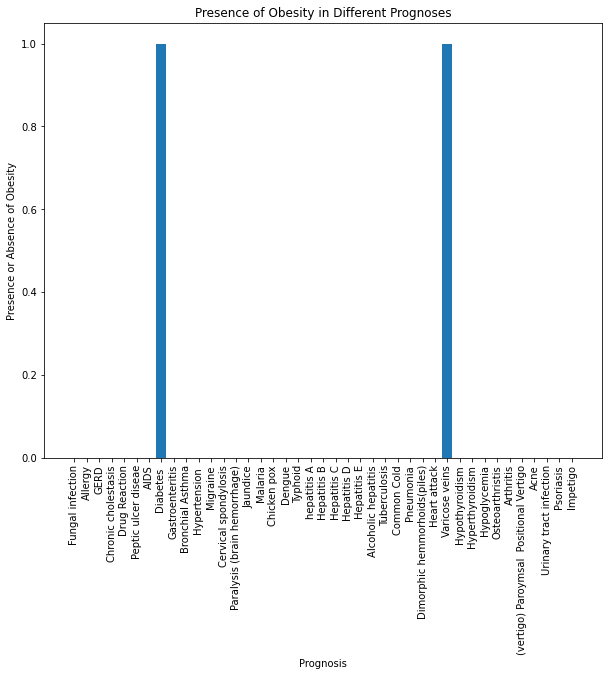

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['obesity'])
plt.title('Presence of Obesity in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Obesity')
plt.xticks(rotation=90);

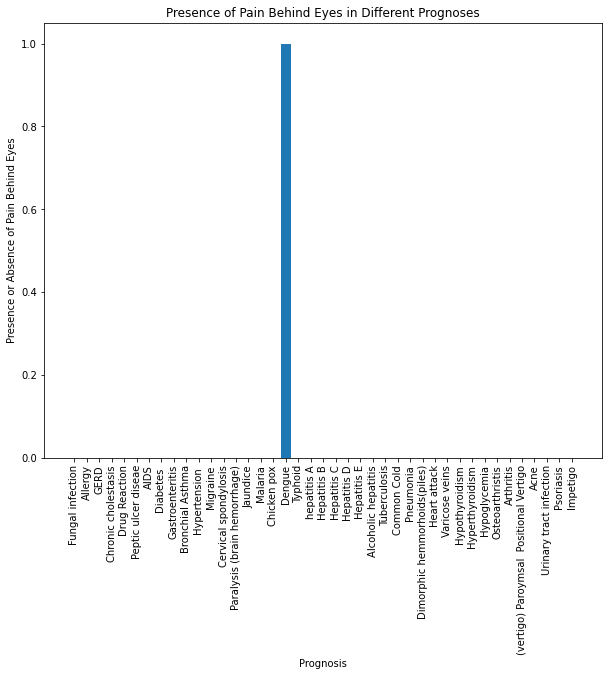

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['pain_behind_the_eyes'])
plt.title('Presence of Pain Behind Eyes in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Pain Behind Eyes')
plt.xticks(rotation=90);

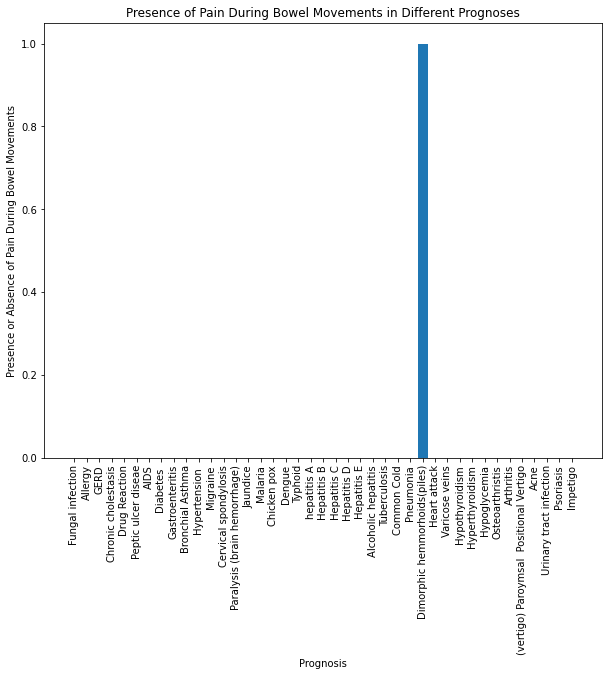

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['pain_during_bowel_movements'])
plt.title('Presence of Pain During Bowel Movements in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Pain During Bowel Movements')
plt.xticks(rotation=90);

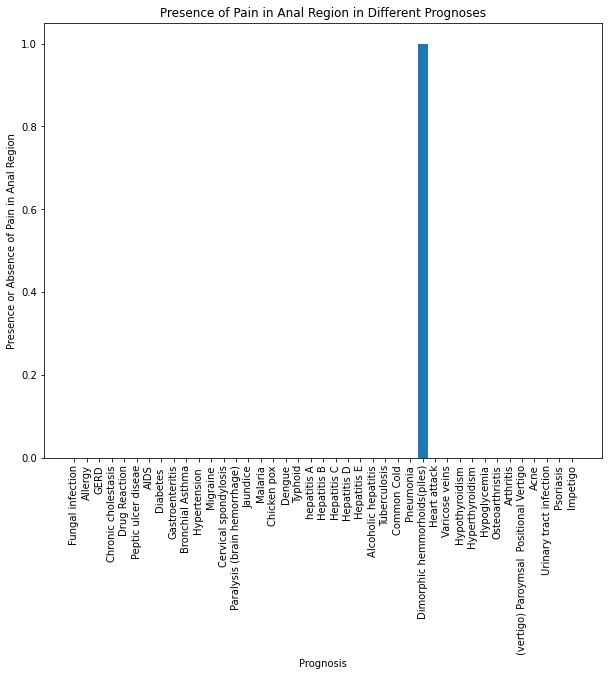

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['pain_in_anal_region'])
plt.title('Presence of Pain in Anal Region in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Pain in Anal Region')
plt.xticks(rotation=90);

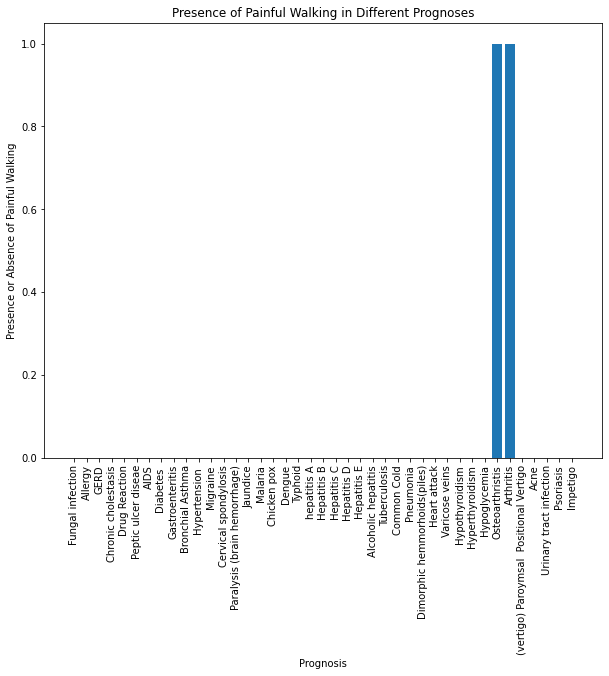

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['painful_walking'])
plt.title('Presence of Painful Walking in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Painful Walking')
plt.xticks(rotation=90);

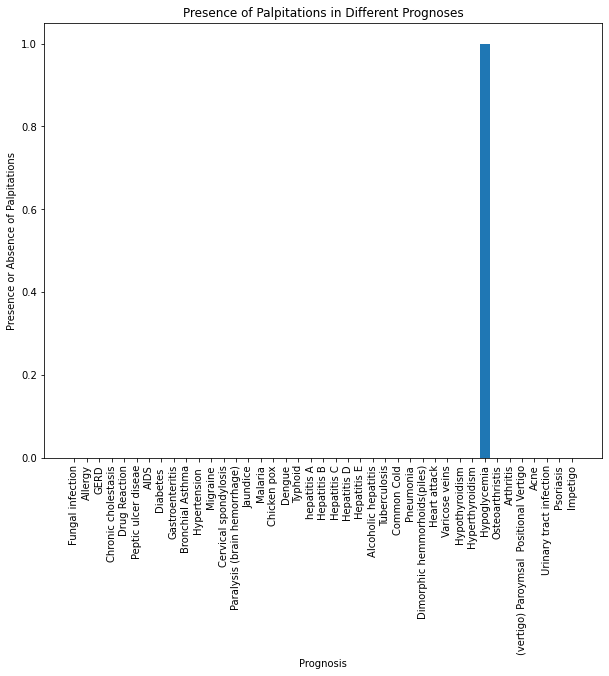

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['palpitations'])
plt.title('Presence of Palpitations in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Palpitations')
plt.xticks(rotation=90);

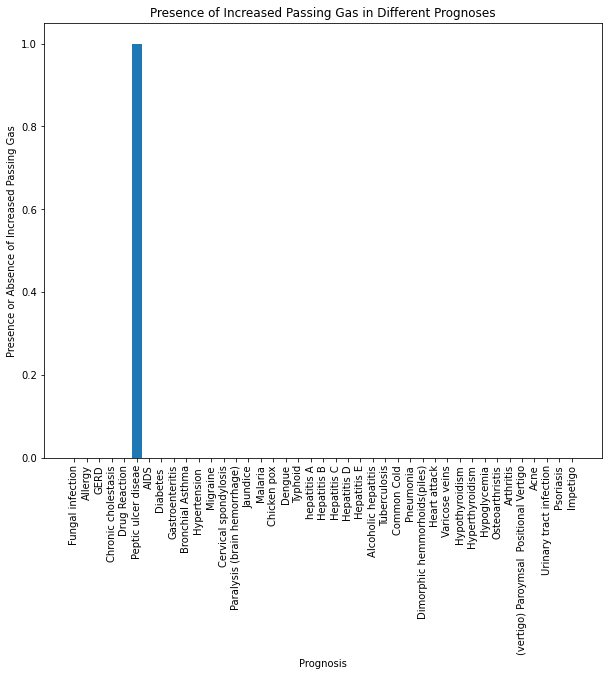

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['passage_of_gases'])
plt.title('Presence of Increased Passing Gas in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Increased Passing Gas')
plt.xticks(rotation=90);

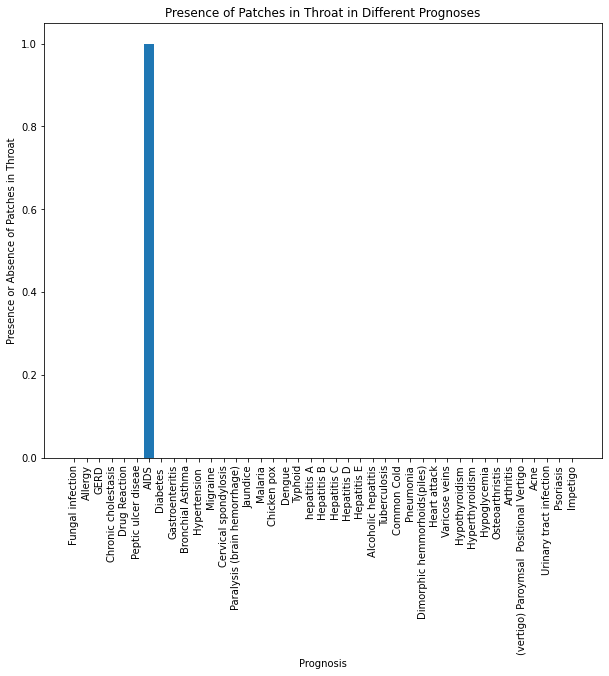

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['patches_in_throat'])
plt.title('Presence of Patches in Throat in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Patches in Throat')
plt.xticks(rotation=90);

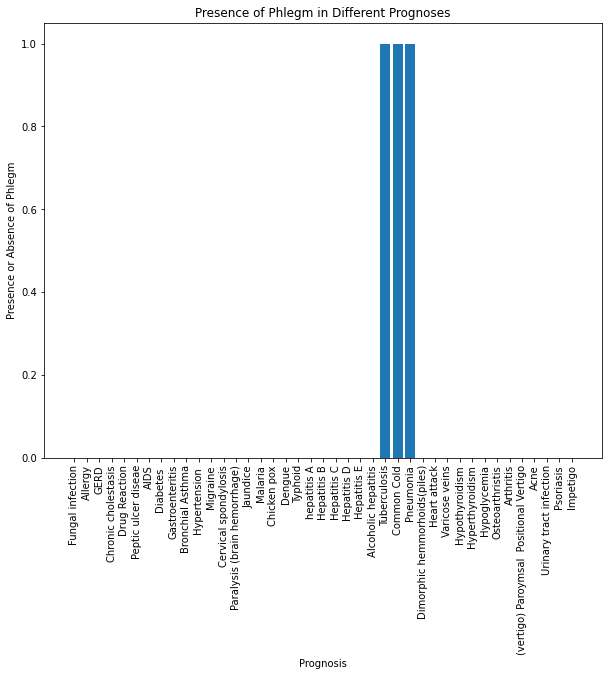

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['phlegm'])
plt.title('Presence of Phlegm in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Phlegm')
plt.xticks(rotation=90);

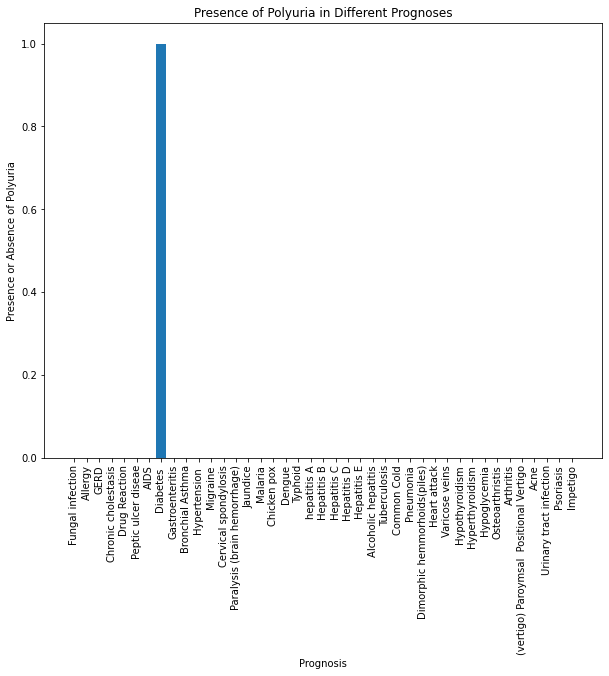

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['polyuria'])
plt.title('Presence of Polyuria in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Polyuria')
plt.xticks(rotation=90);

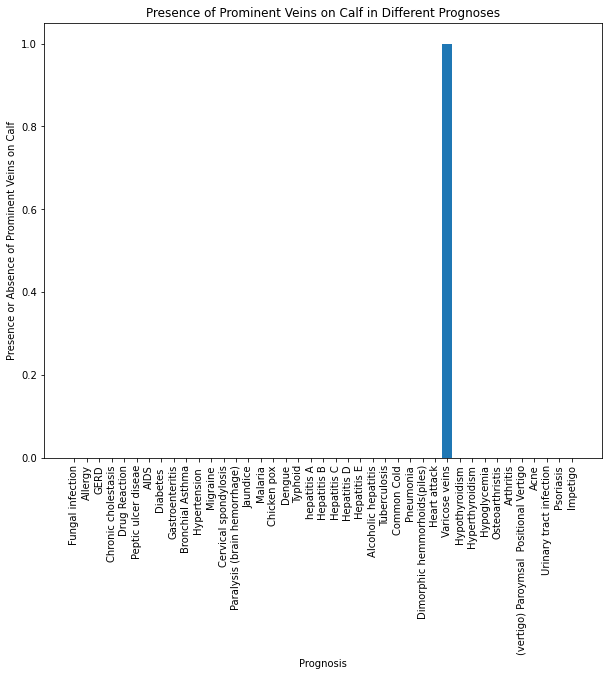

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['prominent_veins_on_calf'])
plt.title('Presence of Prominent Veins on Calf in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Prominent Veins on Calf')
plt.xticks(rotation=90);

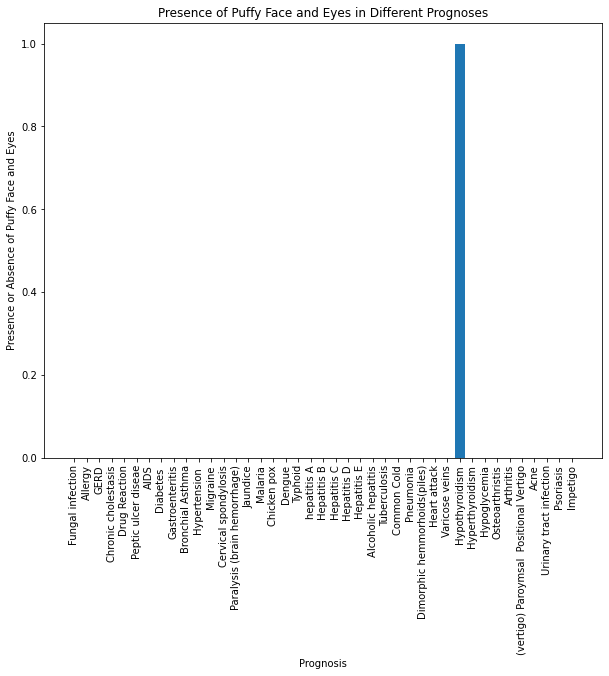

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['puffy_face_and_eyes'])
plt.title('Presence of Puffy Face and Eyes in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Puffy Face and Eyes')
plt.xticks(rotation=90);

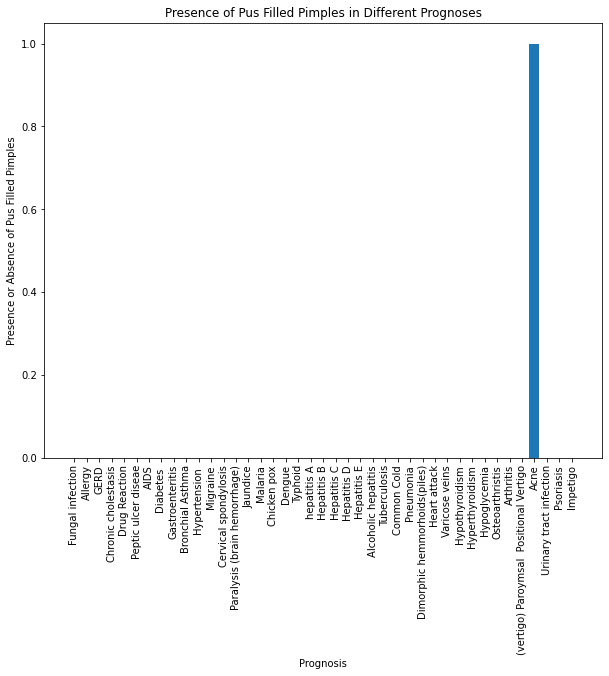

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['pus_filled_pimples'])
plt.title('Presence of Pus Filled Pimples in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Pus Filled Pimples')
plt.xticks(rotation=90);

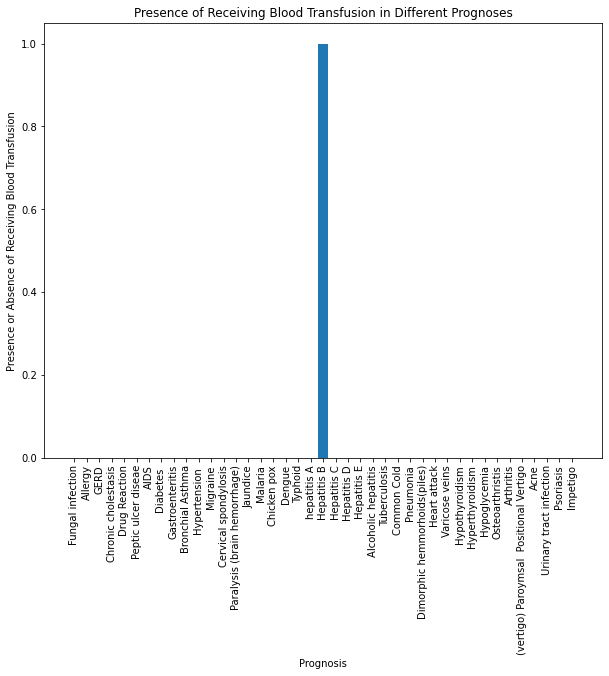

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['receiving_blood_transfusion'])
plt.title('Presence of Receiving Blood Transfusion in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Receiving Blood Transfusion')
plt.xticks(rotation=90);

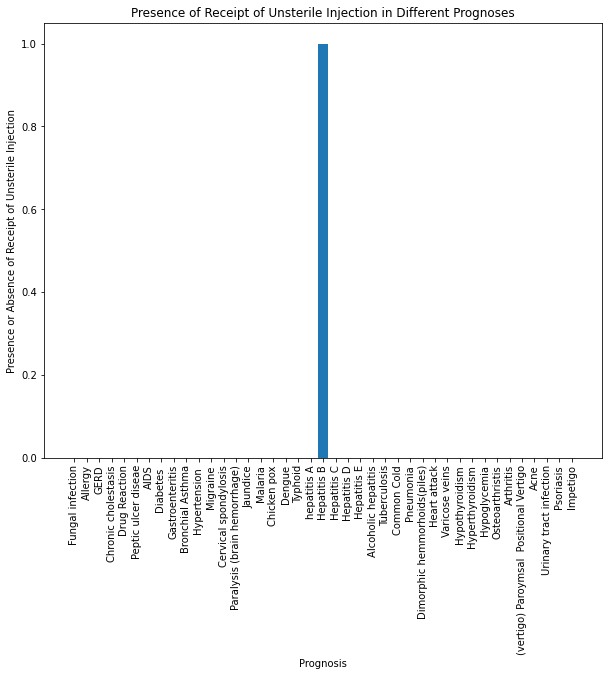

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['prognosis'], height=df['receiving_unsterile_injections'])
plt.title('Presence of Receipt of Unsterile Injection in Different Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Presence or Absence of Receipt of Unsterile Injection')
plt.xticks(rotation=90);

These graphs are very revealing about how this dataset was constructed, and shows important things to consider when applying this dataset clinically. For example, it can be seen in the above graphs that AIDS is the only prognosis with any correlation to extra-marital sexual contact, yet there are other diseases here which can be transferred sexually, and it is entirely possible to have extra-marital sexual contact and have diabetes, although diabetes cannot be transferred via sexual contact. This reveals not only biases in our data, but indicates that this model may be vulnerable to these biases in making predictions.

In [ ]:
number = LabelEncoder()
df['prognosis'] = number.fit_transform(df['prognosis'].astype('str'))

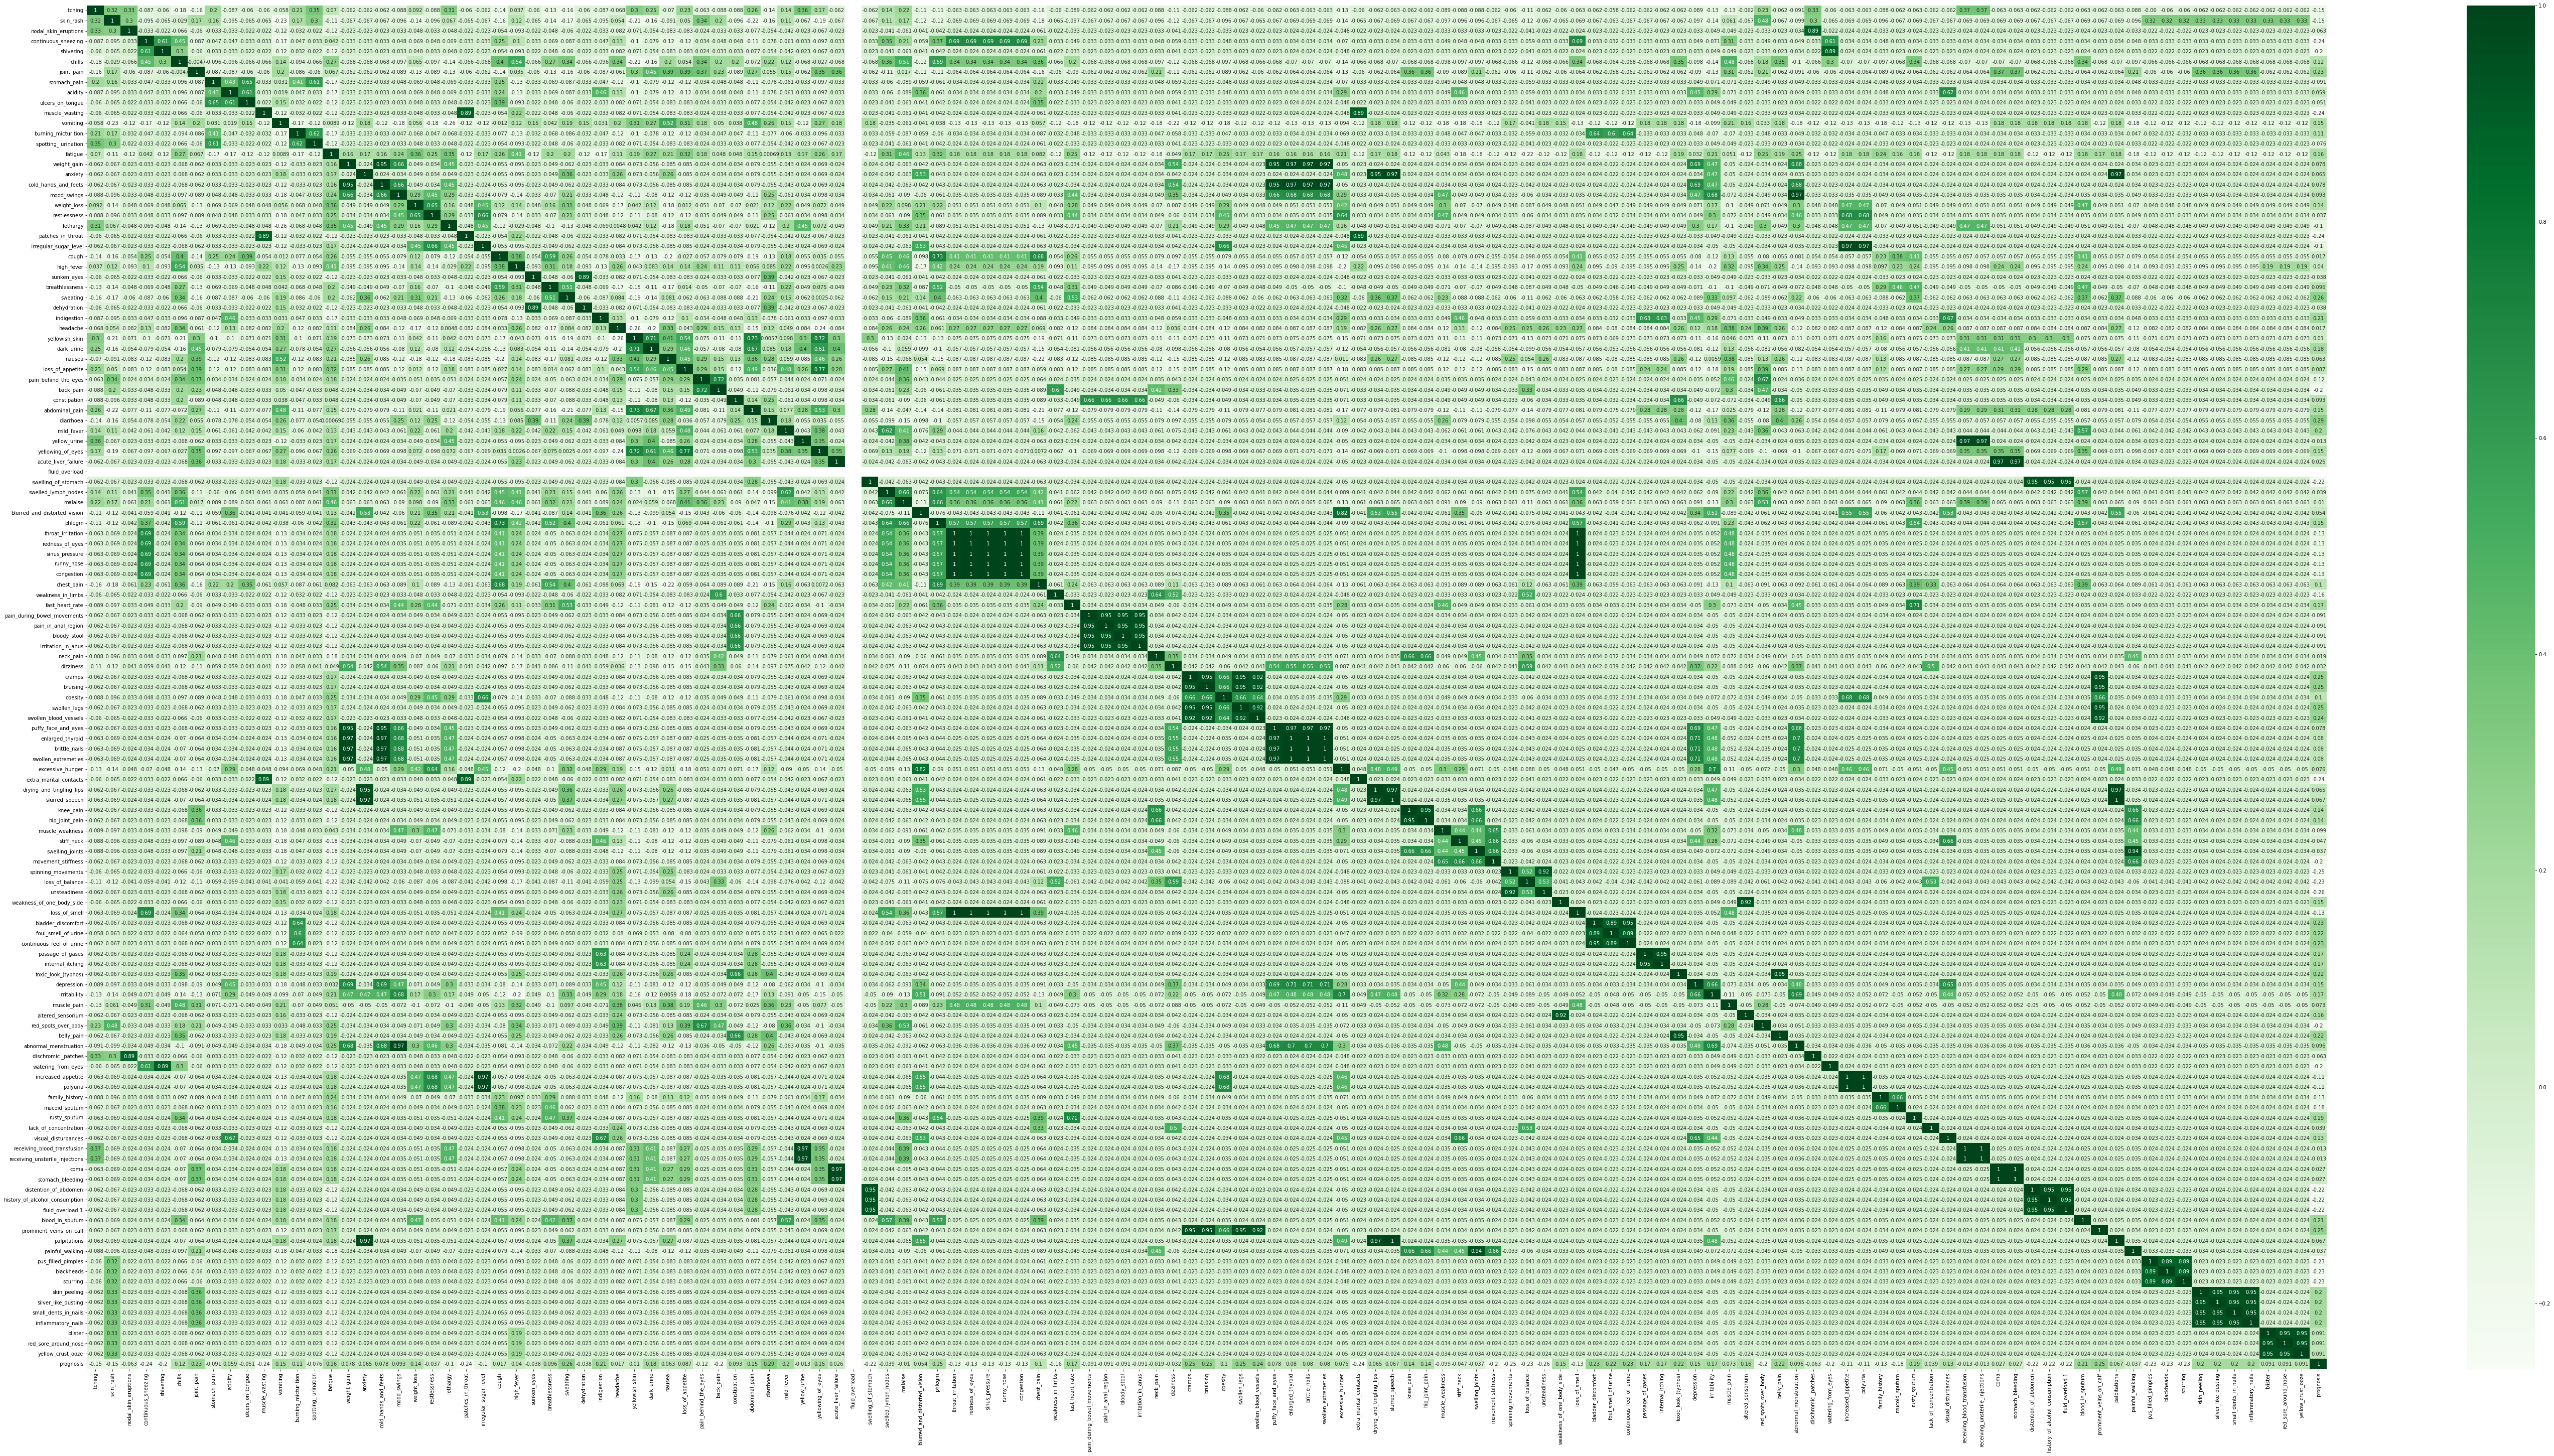

In [ ]:
corr = df.corr()
plt.figure(figsize=(100,50))
sns.heatmap(data=corr, cmap='Greens', annot=True);

Some of these correlations make a lot of sense, and indicate a lot of strengths about the way this data was collected. An example of this can be seen in the thyroid related symptoms of 'enlarged_thyroid', 'puffy_face_and_eyes', 'brittle_nails', and 'swollen_extremities'. These symptoms having such a strong correlation, especially considering the 'prognosis' possibilities include both hypothyroidism and hyperthyroidism, is reassuring about the quality of our dataset. However, we can see some weaknesses as well. 'swollen_extremities' can also be caused by Cushing's syndrome, for example, but this was not tracked as a prognosis. There is also a 100% correlation between slurred speech and palpitations, likely indicating slurred speech was reported by 100% of people with cardiac issues such as hypertension or heart attack, which makes sense in itself. However, we know that slurred speech can also come from developmental disorders, speech impediments, or even a few servings of alcohol. A model built on this dataset may wrongly diagnose someone with a cleft palette as having a heart attack. More data on more variables such as alcohol consumption, and a larger sample with more varying prognoses will  both improve this model's performance on real-world data. 

In [ ]:
X = df.drop(columns=['prognosis'])
y = df['prognosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
rfclass = RandomForestClassifier(min_samples_leaf=120,
                                 random_state=42)

In [ ]:
rfclass.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=120, random_state=42)

In [ ]:
rf_preds = rfclass.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_preds))
#random forest predicted a lot of classes with perfect accuracy, but not all
#a simpler model may perform better

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.87      0.94      0.91        36
           2       0.79      0.94      0.86        33
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00        30
          15       0.41      0.87      0.56        23
          16       1.00      1.00      1.00        37
          17       0.97    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
treeclass = DecisionTreeClassifier(max_depth=30,
                                   min_samples_leaf=5,
                                   random_state=42)

In [ ]:
treeclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=42)

In [ ]:
tree_preds = treeclass.predict(X_test)

In [ ]:
print(classification_report(y_test, tree_preds))
#it looks like this model ignored some prognoses completely
#a gradient boosted model may perform better

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        33
           3       1.00      0.90      0.95        29
           4       1.00      0.86      0.93        29
           5       1.00      0.87      0.93        30
           6       0.00      0.00      0.00        38
           7       1.00      0.90      0.95        29
           8       1.00      1.00      1.00        30
           9       0.86      0.90      0.88        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       0.00      0.00      0.00        37
          14       1.00      0.97      0.98        30
          15       1.00      1.00      1.00        23
          16       0.00      0.00      0.00        37
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb_preds= xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, xgb_preds))
#looks like the gradient boosted model performed perfectly

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        37
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        37
          17       1.00    

In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lgb_preds = lgb.predict(X_test)

In [ ]:
print(classification_report(y_test, lgb_preds))
#the lgb model performed just as well so I'll use this due to less computation needs and faster processing time

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        37
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        37
          17       1.00    